In [ ]:
# Read the .xlsx files and combined them into a single csv file


# Final Excel Hyperlink Extraction Solution

This solution addresses the issue where Excel hyperlinks are stored as `=HYPERLINK()` formulas rather than as hyperlink objects. The function below properly extracts these formula-based hyperlinks.

In [1]:
# import pandas as pd
# import glob
# import os
# import openpyxl
# import re
# from urllib.parse import unquote

# # Function to extract hyperlinks from Excel files with support for HYPERLINK() formulas
# def extract_hyperlinks(excel_file, sheet_name=0):
#     """
#     Extract hyperlinks from Excel files, supporting both standard hyperlinks and HYPERLINK() formulas.
    
#     Parameters:
#     -----------
#     excel_file : str
#         Path to the Excel file
#     sheet_name : int or str, default=0
#         Sheet index (0-based) or name
        
#     Returns:
#     --------
#     dict
#         Dictionary mapping row indices (0-based) to URLs
#     """
#     try:
#         # Load the workbook with formulas preserved
#         wb = openpyxl.load_workbook(excel_file, data_only=False)
        
#         # Handle both sheet name and index
#         try:
#             if isinstance(sheet_name, int):
#                 ws = wb.worksheets[sheet_name]
#             else:
#                 ws = wb[sheet_name]
#         except (IndexError, KeyError) as e:
#             print(f"Error accessing sheet {sheet_name} in {excel_file}: {e}")
#             # Try to use the active sheet as fallback
#             ws = wb.active
#             print(f"Using active sheet instead: {ws.title}")
        
#         # Find the column index for "View Company Online"
#         header_row = next(ws.rows, None)
#         if header_row is None:
#             print(f"Empty worksheet in {excel_file}")
#             return {}
            
#         view_company_col_idx = None
        
#         for idx, cell in enumerate(header_row, 1):  # Excel columns are 1-indexed
#             if cell.value == "View Company Online":
#                 view_company_col_idx = idx
#                 break
        
#         if view_company_col_idx is None:
#             print(f"'View Company Online' column not found in {excel_file}")
#             return {}
        
#         # Create a dictionary to store hyperlinks
#         hyperlinks = {}
        
#         # Regular expression to extract URL from HYPERLINK formula
#         # Format: =HYPERLINK("URL","Text")
#         hyperlink_regex = r'=HYPERLINK\("([^"]+)",.+\)'
        
#         # Start from row 2 (assuming header is row 1)
#         for row_idx in range(2, ws.max_row + 1):
#             try:
#                 cell = ws.cell(row=row_idx, column=view_company_col_idx)
#                 url = None
                
#                 # Method 1: Check if cell contains a HYPERLINK formula
#                 if cell.value and isinstance(cell.value, str) and cell.value.startswith("=HYPERLINK"):
#                     # Extract URL from HYPERLINK formula using regex
#                     match = re.search(hyperlink_regex, cell.value)
#                     if match:
#                         url = match.group(1)  # The captured URL
                
#                 # Method 2: Direct hyperlink attribute (fallback)
#                 if url is None and hasattr(cell, 'hyperlink') and cell.hyperlink is not None:
#                     if hasattr(cell.hyperlink, 'target') and cell.hyperlink.target:
#                         url = cell.hyperlink.target
                
#                 # Method 3: Internal _hyperlink attribute (fallback)
#                 if url is None and hasattr(cell, '_hyperlink') and cell._hyperlink is not None:
#                     if hasattr(cell._hyperlink, 'target') and cell._hyperlink.target:
#                         url = cell._hyperlink.target
                
#                 # Method 4: Check for hyperlink in cell.value as plain text (fallback)
#                 if url is None and isinstance(cell.value, str) and (
#                     cell.value.startswith("http://") or cell.value.startswith("https://")
#                 ):
#                     url = cell.value
                
#                 # If we found a URL, add it to our dictionary
#                 if url:
#                     hyperlinks[row_idx-2] = url  # Adjust for 0-based indexing in pandas
            
#             except Exception as cell_error:
#                 print(f"Error processing cell at row {row_idx}, column {view_company_col_idx} in {excel_file}: {cell_error}")
#                 continue
        
#         return hyperlinks
    
#     except Exception as e:
#         print(f"Error extracting hyperlinks from {excel_file}: {e}")
#         return {}

# # Example usage:
# def process_excel_files(directory="."):
#     """
#     Process all Excel files in a directory, extract hyperlinks, and combine into a CSV.
    
#     Parameters:
#     -----------
#     directory : str, default="."
#         Directory containing Excel files
#     """
#     # Get all .xlsx files in the directory
#     excel_files = glob.glob(os.path.join(directory, "*.xlsx"))
    
#     if not excel_files:
#         print("No Excel files found in the specified directory.")
#         return None
    
#     # Create an empty list to store dataframes
#     dfs = []
    
#     # Process each Excel file
#     for file in excel_files:
#         print(f"Processing file: {file}")
        
#         try:
#             # Read the Excel file
#             df = pd.read_excel(file)
            
#             # Extract hyperlinks
#             hyperlinks = extract_hyperlinks(file)
            
#             # If hyperlinks were found, add them to a new column
#             if hyperlinks:
#                 print(f"Found {len(hyperlinks)} hyperlinks in {file}")
#                 # Create a new column for the actual URLs
#                 df['Company URL'] = df.index.map(lambda idx: hyperlinks.get(idx, None))
#             else:
#                 print(f"No hyperlinks found in {file}")
            
#             dfs.append(df)
#         except Exception as e:
#             print(f"Error processing file {file}: {e}")
#             continue
    
#     # Combine all dataframes into one
#     if dfs:
#         combined_df = pd.concat(dfs, ignore_index=True)

#         # Save to a new CSV file with the URLs
#         output_csv = "combined_test_with_urls.csv"
#         combined_df.to_csv(output_csv, index=False)

#         print(f"Combined {len(dfs)} Excel files with hyperlinks into {output_csv}")
#         return combined_df
#     else:
#         print("No data was processed successfully. Please check the errors above.")
#         return None

# # Run the processing
# combined_data = process_excel_files()

# # Display a sample of the combined data with hyperlinks
# if combined_data is not None and 'Company URL' in combined_data.columns:
#     print("\nSample of combined data with URLs:")
#     print(combined_data[['Company URL']].head())

# Create a test_data directory, convert each row in the combined_test_with_urls.csv to a separate file name with COMPANY_VC_ROUND.CSV with all the headers and single row of data

In [2]:
import os
import pandas as pd

# Create test_data directory if it doesn't exist
os.makedirs('test_data', exist_ok=True)

# Read the CSV file
df = pd.read_csv('combined_test_with_urls.csv')

# Create individual CSV files for each row
for _, row in df.iterrows():
    # Create filename using company name and VC round
    # Clean company name by removing special characters and replacing spaces with underscores
    company_name = str(row['Companies']).replace('/', '_').replace('\\', '_').replace(':', '_').replace('*', '_').replace('?', '_').replace('"', '_').replace('<', '_').replace('>', '_').replace('|', '_').strip()
    company_name = company_name.replace(' ', '_')
    
    # Get VC round, use 'Unknown' if not available
    vc_round = str(row['VC Round']) if pd.notna(row['VC Round']) else 'Unknown'
    
    # Create the filename
    filename = f"{company_name}_{vc_round}.csv"
    filename = filename.replace(' ', '_')  # Ensure no spaces in filename
    filepath = os.path.join('test_data', filename)
    
    # Convert the single row to a DataFrame and save as CSV
    row_df = pd.DataFrame([row])
    row_df.to_csv(filepath, index=False)
    
    # Print progress
    print(f"Saved: {filename}")

print(f"Converted {len(df)} rows to individual CSV files in 'test_data' directory")

Saved: Zilch_(Financial_Software)_2nd_Round.csv
Saved: Zilch_(Financial_Software)_3rd_Round.csv
Saved: Zenjob_4th_Round.csv
Saved: Zenjob_5th_Round.csv
Converted 4 rows to individual CSV files in 'test_data' directory


In [ ]:
7

In [1]:
# Load and explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('combined_data_with_urls.csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"Number of unique companies: {df['Companies'].nunique()}")

# Check target variables for valuation prediction
valuation_columns = ['Deal Size', 'Pre-money Valuation', 'Post Valuation']
for col in valuation_columns:
    print(f"{col}: {df[col].notna().sum()} non-null values")

# Display a sample of the data
df.head(2)

Dataset shape: (87, 175)
Number of unique companies: 40
Deal Size: 87 non-null values
Pre-money Valuation: 87 non-null values
Post Valuation: 87 non-null values


,Deal ID,Companies,Company ID,Registration Number,Description,Financing Status Note,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,...,USD Second-Lien New Money,EUR Total Institutional New Money,EUR First-Lien New Money,EUR First-Lien Institutional New Money,EUR Second-Lien New Money,Total First-Lien Institutional New Money,Total New Money,Total New Inst Amount,View Company Online,Company URL
0,131215-69T,Dixa,173025-28,36561009.0,Developer of a conversational customer engagem...,The company raised an undisclosed amount of ve...,Information Technology,Software,Communication Software,"Business/Productivity Software, Communication ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Company Online,https://my.pitchbook.com?c=131215-69T
1,177297-49T,Dixa,173025-28,36561009.0,Developer of a conversational customer engagem...,The company raised an undisclosed amount of ve...,Information Technology,Software,Communication Software,"Business/Productivity Software, Communication ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,View Company Online,https://my.pitchbook.com?c=177297-49T



Missing values in key columns:
Deal Type 3             87
Add-on Sponsors         87
Contingent Payout       87
Add-on Platform         87
Valuation/Cash Flow     87
Deal Size/Cash Flow     87
Implied EV/EBIT         87
Implied EV/Cash Flow    87
Implied EV/Revenue      87
Implied EV              87
dtype: int64

Percentage of missing values in key columns:
Deal Type 3                            100.0
Valuation/Cash Flow                    100.0
Add-on Sponsors                        100.0
Add-on Platform                        100.0
Contingent Payout                      100.0
Exiters with no Proceeds               100.0
Implied EV                             100.0
Dividend/Distribution Beneficiaries    100.0
Club Amount                            100.0
Pro Forma Revenue (Reported)           100.0
dtype: float64


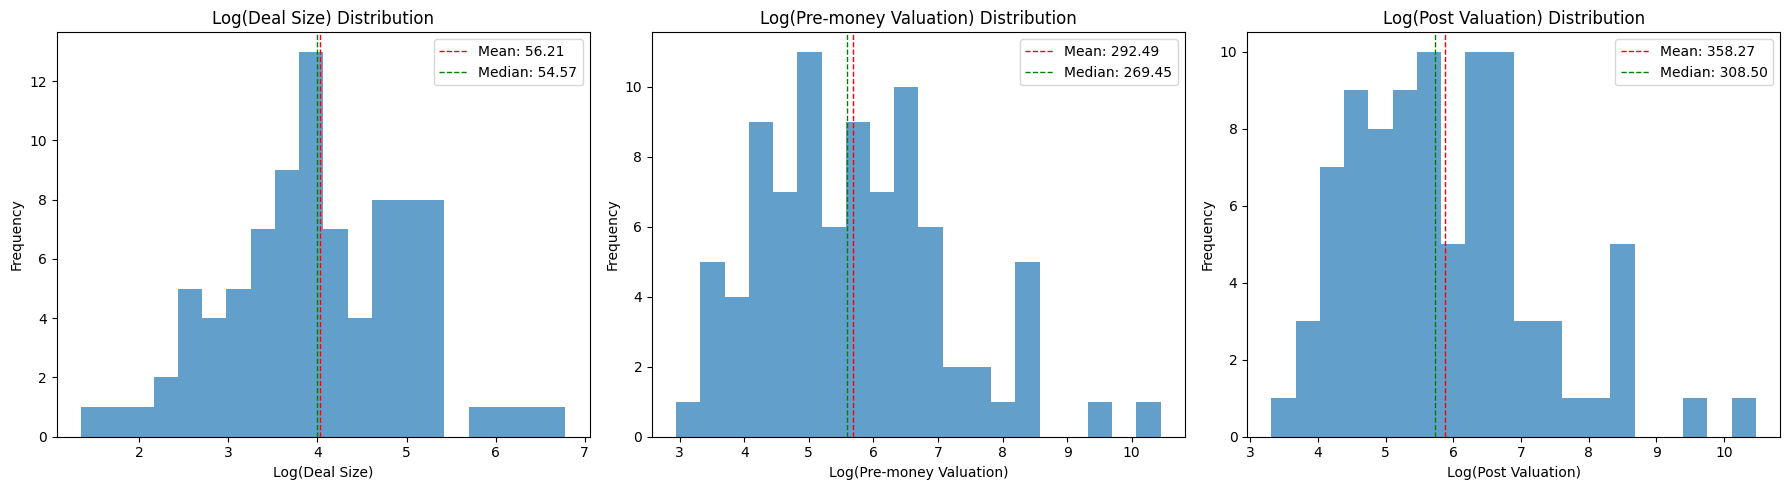


Date-related columns:
['Announced Date', 'Deal Date', 'Raised to Date', 'Launch Date']

Unique values in Current Financing Status:
Current Financing Status
Venture Capital-Backed    82
Private Equity-Backed      5
Name: count, dtype: int64

Unique values in Current Business Status:
Current Business Status
Generating Revenue    85
Profitable             2
Name: count, dtype: int64

Unique values in Primary Industry Sector:
Primary Industry Sector
Information Technology                  70
Consumer Products and Services (B2C)     8
Business Products and Services (B2B)     5
Healthcare                               2
Energy                                   2
Name: count, dtype: int64

Deal Types:
Deal Type
Later Stage VC    81
Early Stage VC     6
Name: count, dtype: int64

Time-related columns:
['Announced Date', 'Deal Date', 'Raised to Date', 'Fiscal Year', 'Year Founded', 'Patents Expiring the Next Year', 'Pro Forma Leverage (Reported)', 'Pro Forma Sr. Leverage (Reported)', 'Launch D

In [3]:
# Detailed data exploration and analysis

# Check for missing values in important columns
missing_data = df.isna().sum()
print("\nMissing values in key columns:")
print(missing_data[missing_data > 0].sort_values(ascending=False).head(10))

# Calculate percentage of missing values
missing_percent = (missing_data / len(df)) * 100
print("\nPercentage of missing values in key columns:")
print(missing_percent[missing_percent > 50].sort_values(ascending=False).head(10))

# Explore target variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(valuation_columns):
    # Filter out NaN values
    valid_data = df[col].dropna()
    
    # Log transform to handle skewness
    log_data = np.log1p(valid_data)
    
    # Plot histograms
    axes[i].hist(log_data, bins=20, alpha=0.7)
    axes[i].set_title(f'Log({col}) Distribution')
    axes[i].set_xlabel(f'Log({col})')
    axes[i].set_ylabel('Frequency')
    
    # Add some stats
    axes[i].axvline(log_data.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {np.exp(log_data.mean()):.2f}')
    axes[i].axvline(log_data.median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {np.exp(log_data.median()):.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Check for temporal information to sort rounds by date
date_columns = [col for col in df.columns if 'date' in col.lower()]
print("\nDate-related columns:")
print(date_columns)

# Check unique values in key categorical columns
for col in ['Current Financing Status', 'Current Business Status', 'Primary Industry Sector']:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].value_counts().head(10))

# Look at the deal types
if 'Deal Type' in df.columns:
    print("\nDeal Types:")
    print(df['Deal Type'].value_counts())

# Check for features that might indicate company age or stage
time_related_cols = [col for col in df.columns if any(term in col.lower() for term in ['year', 'date', 'founded', 'age'])]
print("\nTime-related columns:")
print(time_related_cols)

# Building a Valuation Prediction Model

Now we'll implement the machine learning approach as outlined:
1. Find all unique companies
2. For each company, separate the latest funding round
3. Train models on earlier rounds
4. Predict valuation for the latest round and compare with actual values

We'll use 'Post Valuation' as our target variable since it represents the company value after the investment.

In [6]:
# Prepare data for company-wise validation

# First, we need to ensure we have a date column to identify the latest round
if 'Deal Date' in df.columns:
    # Convert to datetime
    df['Deal Date'] = pd.to_datetime(df['Deal Date'], errors='coerce')
    print("Using 'Deal Date' to identify funding rounds")
elif 'Announced Date' in df.columns:
    # Use announced date as fallback
    df['Deal Date'] = pd.to_datetime(df['Announced Date'], errors='coerce')
    print("Using 'Announced Date' to identify funding rounds")
else:
    # Create a proxy date if no date column exists
    print("Warning: No date column found. Using row order as proxy for round sequence.")
    df['Deal Date'] = pd.NaT

# Choose our target variable - Post Valuation
target_variable = 'Post Valuation'
print(f"Target variable: {target_variable}")

# Check how many companies have multiple rounds
company_round_counts = df.groupby('Companies')['Deal ID'].count()
companies_with_multiple_rounds = company_round_counts[company_round_counts > 1].index.tolist()
print(f"\nFound {len(companies_with_multiple_rounds)} companies with multiple funding rounds")

# Create a new dataset with only companies that have multiple rounds
multi_round_df = df[df['Companies'].isin(companies_with_multiple_rounds)].copy()

# Sort by company and date
multi_round_df = multi_round_df.sort_values(['Companies', 'Deal Date'])

# For each company, identify the latest round
latest_rounds = multi_round_df.groupby('Companies').apply(lambda x: x.iloc[-1]).reset_index(drop=True)
training_rounds = multi_round_df[~multi_round_df['Deal ID'].isin(latest_rounds['Deal ID'])].reset_index(drop=True)

print(f"Training set: {training_rounds.shape[0]} funding rounds")
print(f"Test set (latest rounds): {latest_rounds.shape[0]} funding rounds")

# Check for NaN values in target variable
print(f"\nTraining rounds with valid {target_variable}: {training_rounds[target_variable].notna().sum()}")
print(f"Test rounds with valid {target_variable}: {latest_rounds[target_variable].notna().sum()}")

# Remove rows with NaN target values from both sets
training_rounds = training_rounds[training_rounds[target_variable].notna()].reset_index(drop=True)
latest_rounds = latest_rounds[latest_rounds[target_variable].notna()].reset_index(drop=True)

print(f"\nFinal training set: {training_rounds.shape[0]} rounds")
print(f"Final test set: {latest_rounds.shape[0]} rounds")

# Take a deeper look at the available features
print("\nSample of available features for training:")
for col in ['Primary Industry Sector', 'Current Business Status', 'Deal Type', 'VC Round']:
    if col in training_rounds.columns:
        print(f"\n{col} distribution:")
        print(training_rounds[col].value_counts().head(5))

# Check the numeric features we can use for modeling
numeric_features = training_rounds.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nNumeric features available: {len(numeric_features)}")
print(numeric_features[:10], "...")

# Check categorical features
categorical_features = training_rounds.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"\nCategorical features available: {len(categorical_features)}")
print(categorical_features[:10], "...")

# Analyze correlations with target variable
if training_rounds.shape[0] > 5:  # Only if we have enough data
    numeric_data = training_rounds[numeric_features + [target_variable]].copy()
    try:
        # Get the correlation matrix and extract the target column
        corr_matrix = numeric_data.corr()
        if target_variable in corr_matrix.columns:
            correlation_with_target = corr_matrix[target_variable]
            # Convert to DataFrame for more robust sorting, ensuring we get a 1D array
            # Fix for "Data must be 1-dimensional" error by checking type before conversion
            if isinstance(correlation_with_target, pd.Series):
                corr_df = correlation_with_target.to_frame(name='Correlation')
            else:
                # If it's already a DataFrame, create a new one with just the correlation column
                corr_df = pd.DataFrame({'Correlation': correlation_with_target.values}, index=correlation_with_target.index)
                
            corr_df = corr_df.sort_values(by='Correlation', ascending=False)
            
            print("\nTop correlations with target:")
            print(corr_df.head(10))
            print("\nBottom correlations with target:")
            print(corr_df.tail(10))
        else:
            print(f"\nWarning: {target_variable} not found in correlation matrix")
    except Exception as e:
        print(f"\nError calculating correlations: {e}")

    # Plot top correlations
    try:
        if 'corr_df' in locals() and not corr_df.empty:
            plt.figure(figsize=(10, 6))
            
            # Get top correlations (excluding the target's correlation with itself)
            plot_data = corr_df.head(11)
            plot_data = plot_data[plot_data.index != target_variable]
            
            if not plot_data.empty:
                # Create bar plot using proper format
                plt.barh(plot_data.index, plot_data['Correlation'].values)
                plt.title(f'Top Features Correlated with {target_variable}')
                plt.xlabel('Correlation')
                plt.tight_layout()
                plt.show()
            else:
                print("Not enough valid correlations to plot")
    except Exception as e:
        print(f"Error plotting correlations: {e}")

Using 'Deal Date' to identify funding rounds
Target variable: Post Valuation

Found 40 companies with multiple funding rounds
Training set: 47 funding rounds
Test set (latest rounds): 40 funding rounds

Training rounds with valid Post Valuation: 47
Test rounds with valid Post Valuation: 40

Final training set: 47 rounds
Final test set: 40 rounds

Sample of available features for training:

Primary Industry Sector distribution:
Primary Industry Sector
Information Technology                  38
Consumer Products and Services (B2C)     4
Business Products and Services (B2B)     3
Healthcare                               1
Energy                                   1
Name: count, dtype: int64

Current Business Status distribution:
Current Business Status
Generating Revenue    46
Profitable             1
Name: count, dtype: int64

Deal Type distribution:
Deal Type
Later Stage VC    41
Early Stage VC     6
Name: count, dtype: int64

VC Round distribution:
VC Round
3rd Round    15
4th Round    

In [7]:
# Feature selection and preparation

# Let's select the most relevant features for our prediction model
# We'll use a combination of domain knowledge and correlation analysis

# Financial metrics (if available)
financial_metrics = [
    'Deal Size', 'Pre-money Valuation',
    'Revenue', 'EBITDA', 'Net Income', 'Gross Profit',
    'Employees', '# Investors', '# New Investors', '# Follow-on Investors',
    'Raised to Date', 'Total Invested Equity'
]

# Company characteristics
company_features = [
    'Primary Industry Sector', 'Primary Industry Group', 
    'Current Business Status', 'Current Financing Status',
    'Year Founded'
]

# Deal characteristics
deal_features = [
    'Deal Type', 'VC Round', 'Financing Status'
]

# Create a list of selected features
potential_features = financial_metrics + company_features + deal_features

# Filter to only include columns that actually exist in our dataset
selected_features = [col for col in potential_features if col in training_rounds.columns]
print(f"Selected {len(selected_features)} features for modeling:")
print(selected_features)

# Separate features into numerical and categorical
numerical_features = []
categorical_features = []

for feature in selected_features:
    if feature == target_variable:  # Skip the target
        continue
    
    if training_rounds[feature].dtype in ['int64', 'float64']:
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

print(f"\nNumerical features: {len(numerical_features)}")
print(numerical_features)
print(f"\nCategorical features: {len(categorical_features)}")
print(categorical_features)

# Prepare our feature sets for training
X_train = training_rounds[selected_features].copy()
y_train = np.log1p(training_rounds[target_variable])  # Log transform for better prediction

# Prepare test set (latest rounds)
X_test = latest_rounds[selected_features].copy()
y_test = np.log1p(latest_rounds[target_variable])

print(f"\nTraining data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Check for missing values in feature sets
print(f"\nMissing values in training features:")
print(X_train.isna().sum().sum())
print(f"Missing values in test features:")
print(X_test.isna().sum().sum())

# Create preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preview the preprocessing steps
print("\nPreprocessing pipeline configured:")
print(f"- {len(numerical_features)} numerical features will be imputed and scaled")
print(f"- {len(categorical_features)} categorical features will be one-hot encoded")

Selected 20 features for modeling:
['Deal Size', 'Pre-money Valuation', 'Revenue', 'EBITDA', 'Net Income', 'Gross Profit', 'Employees', '# Investors', '# New Investors', '# Follow-on Investors', 'Raised to Date', 'Total Invested Equity', 'Primary Industry Sector', 'Primary Industry Group', 'Current Business Status', 'Current Financing Status', 'Year Founded', 'Deal Type', 'VC Round', 'Financing Status']

Numerical features: 13
['Deal Size', 'Pre-money Valuation', 'Revenue', 'EBITDA', 'Net Income', 'Gross Profit', 'Employees', '# Investors', '# New Investors', '# Follow-on Investors', 'Raised to Date', 'Total Invested Equity', 'Year Founded']

Categorical features: 7
['Primary Industry Sector', 'Primary Industry Group', 'Current Business Status', 'Current Financing Status', 'Deal Type', 'VC Round', 'Financing Status']

Training data shape: (47, 20)
Test data shape: (40, 20)

Missing values in training features:
68
Missing values in test features:
69

Preprocessing pipeline configured:
-


Training Random Forest...

Random Forest Performance:
Mean Absolute Error: $969.15
Mean Absolute Percentage Error: 16.71%
Root Mean Squared Error: $4,641.39
R² Score (log scale): 0.9324


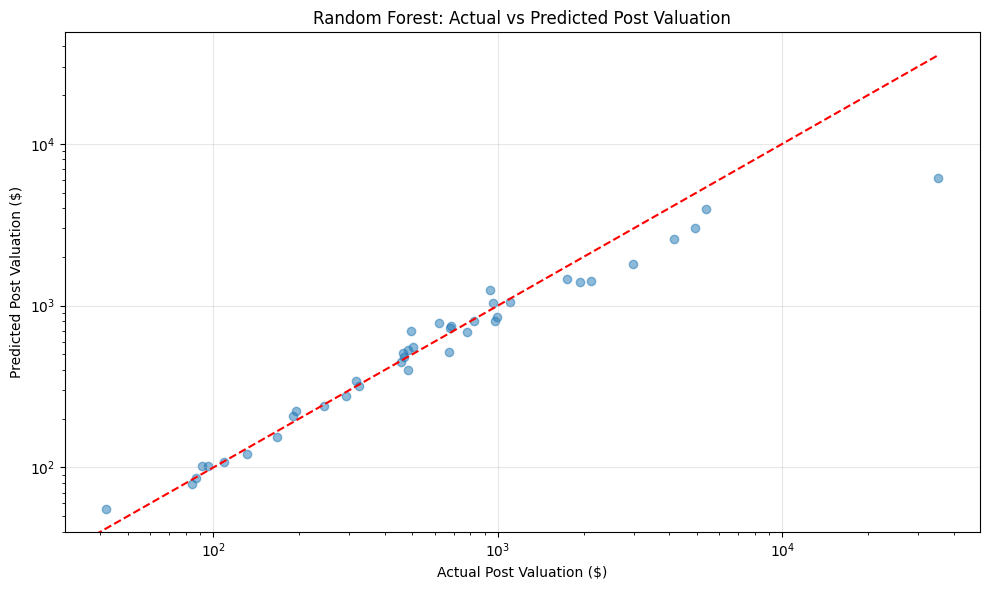

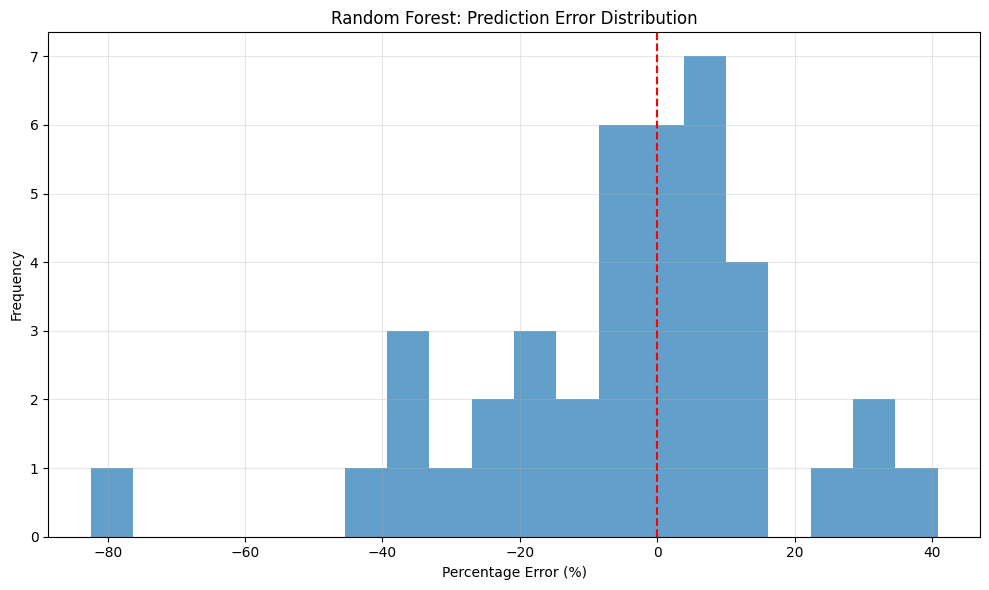


Training Gradient Boosting...

Gradient Boosting Performance:
Mean Absolute Error: $791.80
Mean Absolute Percentage Error: 12.11%
Root Mean Squared Error: $4,303.06
R² Score (log scale): 0.9564


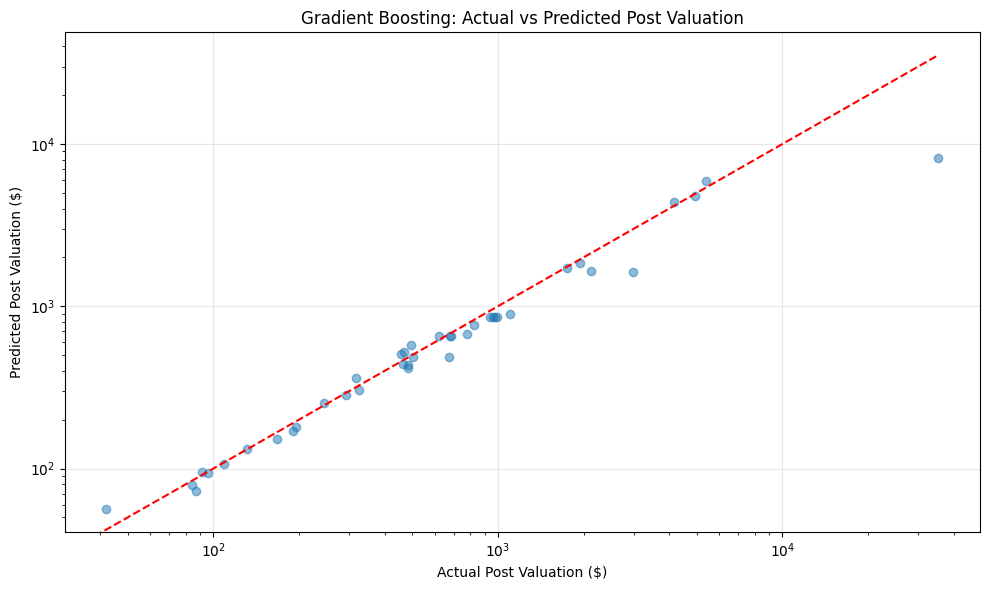

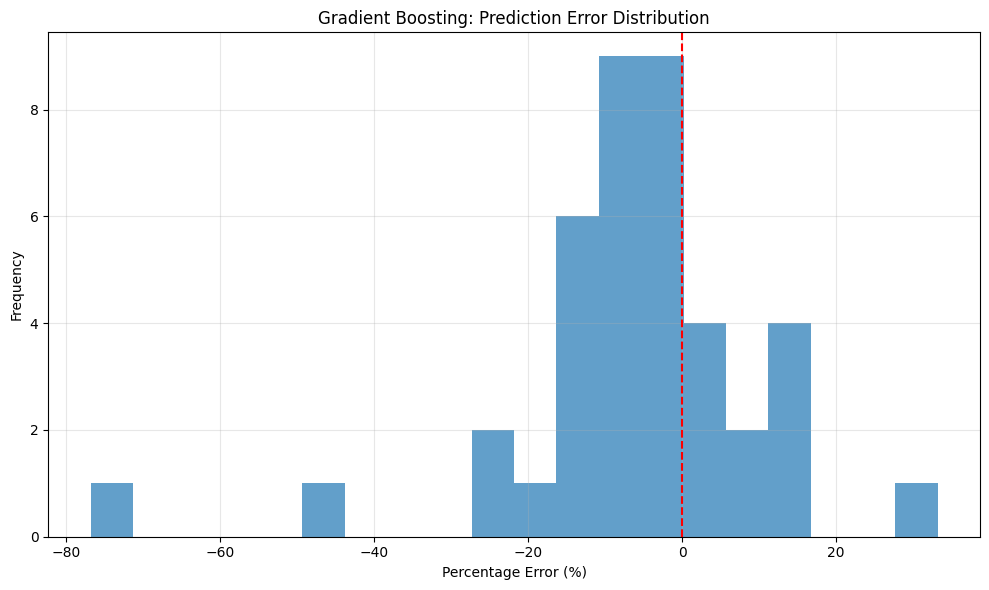


Training Elastic Net...

Elastic Net Performance:
Mean Absolute Error: $1,437.10
Mean Absolute Percentage Error: 62.59%
Root Mean Squared Error: $5,439.97
R² Score (log scale): 0.4597


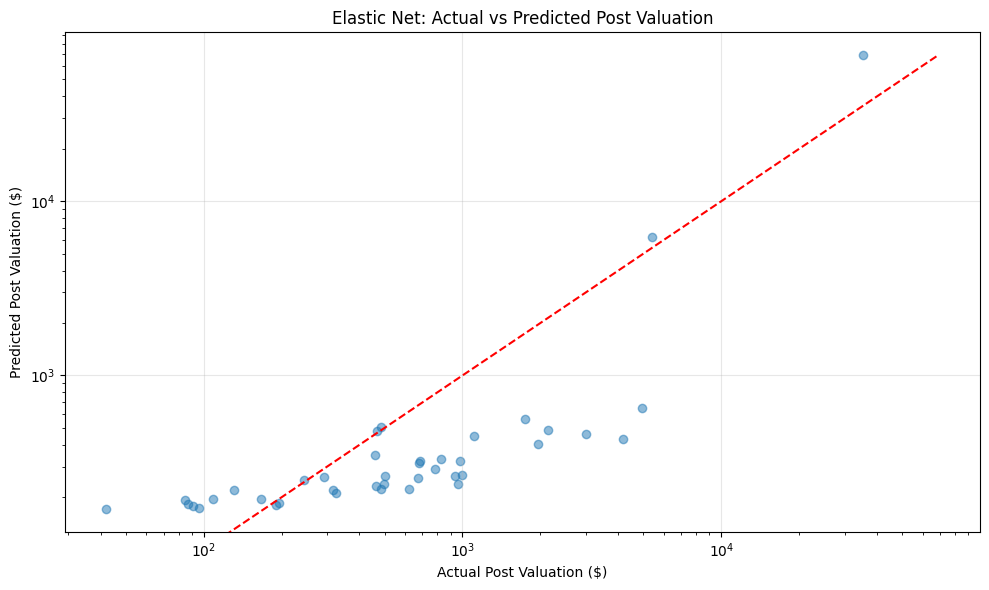

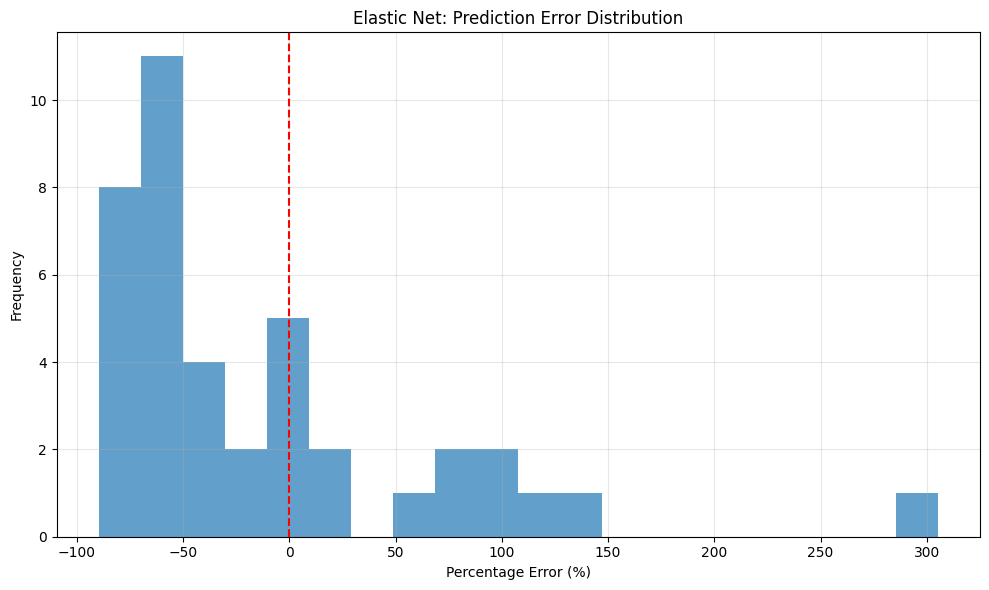


Model Performance Comparison:
                           mae       mape         rmse        r2
Random Forest       969.145846  16.708796  4641.391495  0.932353
Gradient Boosting   791.803956  12.107287  4303.059815  0.956387
Elastic Net        1437.097452  62.586306  5439.965951  0.459735


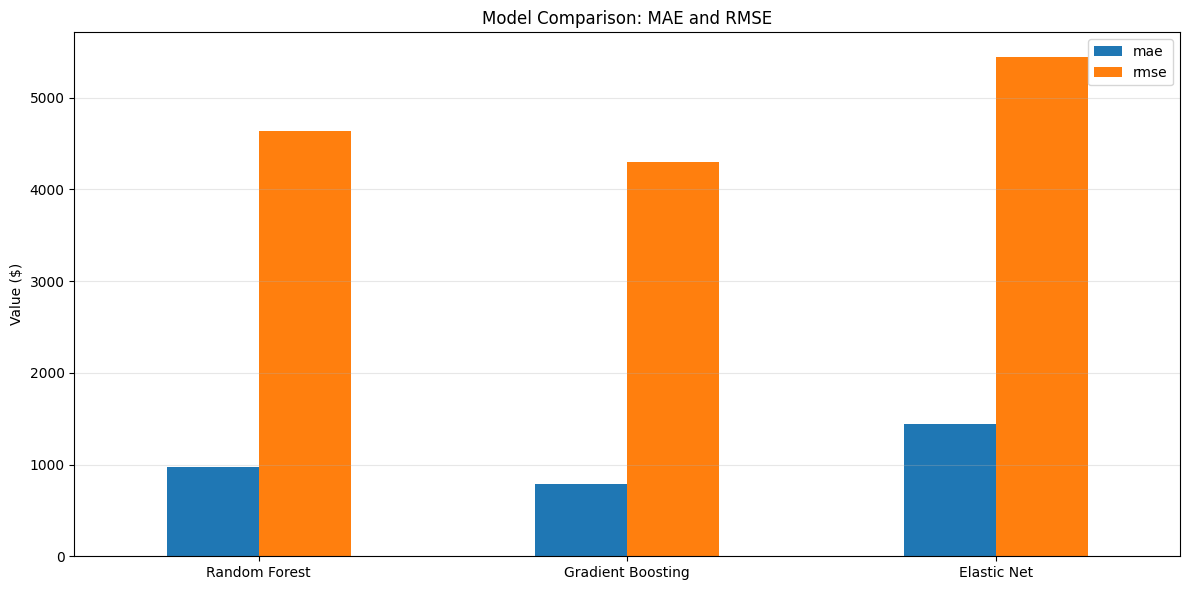

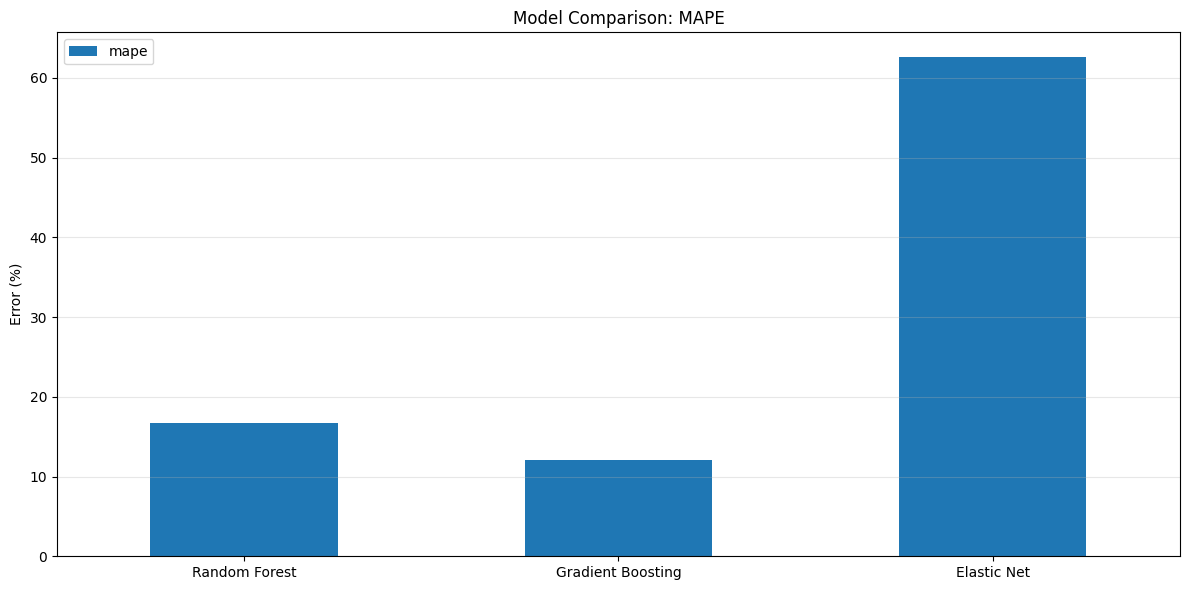


Best model based on MAPE: Gradient Boosting

Detailed Prediction Results (sorted by error):
                  Company  Actual Valuation  Predicted Valuation  \
8                  Cowboy           $131.44              $132.42   
21             Multiverse          $1750.65             $1728.45   
37                Vitesse            $95.97               $94.00   
30  Reactive Technologies           $108.62              $106.03   
10                   Dixa           $292.53              $284.90   
4              Builder.ai           $502.50              $489.00   
7                 Cognism           $245.25              $252.45   
29               Quantexa           $678.68              $654.37   
39                   Ōura          $4945.55             $4760.86   
35        Thought Machine          $1949.91             $1859.08   

    Percentage Error                              Industry  
8              $0.75  Consumer Products and Services (B2C)  
21             $1.27  Business Produ

In [8]:
# Model Building and Evaluation

# Define the evaluation function
def evaluate_model(y_true, y_pred, model_name, plot=True):
    # Convert from log space back to original values
    y_true_orig = np.expm1(y_true)
    y_pred_orig = np.expm1(y_pred)
    
    # Calculate metrics
    mae = mean_absolute_error(y_true_orig, y_pred_orig)
    mape = np.mean(np.abs((y_true_orig - y_pred_orig) / y_true_orig)) * 100
    rmse = np.sqrt(mean_squared_error(y_true_orig, y_pred_orig))
    r2 = r2_score(y_true, y_pred)  # R² on log scale is more meaningful
    
    print(f"\n{model_name} Performance:")
    print(f"Mean Absolute Error: ${mae:,.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.2f}%")
    print(f"Root Mean Squared Error: ${rmse:,.2f}")
    print(f"R² Score (log scale): {r2:.4f}")
    
    if plot and len(y_true) > 5:
        # Plot predicted vs actual
        plt.figure(figsize=(10, 6))
        plt.scatter(y_true_orig, y_pred_orig, alpha=0.5)
        
        # Add perfect prediction line
        max_val = max(y_true_orig.max(), y_pred_orig.max())
        plt.plot([0, max_val], [0, max_val], 'r--')
        
        plt.title(f'{model_name}: Actual vs Predicted {target_variable}')
        plt.xlabel(f'Actual {target_variable} ($)')
        plt.ylabel(f'Predicted {target_variable} ($)')
        plt.xscale('log')
        plt.yscale('log')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Plot error distribution
        errors = y_pred_orig - y_true_orig
        percentage_errors = (errors / y_true_orig) * 100
        
        plt.figure(figsize=(10, 6))
        plt.hist(percentage_errors, bins=20, alpha=0.7)
        plt.axvline(0, color='r', linestyle='--')
        plt.title(f'{model_name}: Prediction Error Distribution')
        plt.xlabel('Percentage Error (%)')
        plt.ylabel('Frequency')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    return {'mae': mae, 'mape': mape, 'rmse': rmse, 'r2': r2}

# Create and train models if we have enough data
if len(X_train) >= 5 and len(X_test) >= 1:
    # Random Forest model
    rf_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    
    # Gradient Boosting model
    gb_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ])
    
    # Linear model with regularization
    linear_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42))
    ])
    
    # Dictionary to store results
    model_results = {}
    
    # Train and evaluate each model
    for name, pipeline in [
        ("Random Forest", rf_pipeline),
        ("Gradient Boosting", gb_pipeline),
        ("Elastic Net", linear_pipeline)
    ]:
        print(f"\nTraining {name}...")
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        
        # Evaluate model
        results = evaluate_model(y_test, y_pred, name)
        model_results[name] = results
        
        # Feature importance (for tree-based models)
        if hasattr(pipeline['model'], 'feature_importances_'):
            # Get feature names after preprocessing
            feature_names = numerical_features + categorical_features
            
            # Get feature importances
            importances = pipeline['model'].feature_importances_
            
            # Sort and plot top features
            if len(importances) == len(feature_names):  # Direct mapping
                indices = np.argsort(importances)[::-1]
                top_n = min(10, len(indices))
                
                plt.figure(figsize=(10, 6))
                plt.barh(range(top_n), importances[indices[:top_n]], align='center')
                plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
                plt.title(f'Top Features for {name}')
                plt.xlabel('Relative Importance')
                plt.tight_layout()
                plt.show()
    
    # Compare model performances
    print("\nModel Performance Comparison:")
    metrics_df = pd.DataFrame(model_results).T
    print(metrics_df)
    
    # Visualize model comparison
    plt.figure(figsize=(12, 6))
    metrics_df[['mae', 'rmse']].plot(kind='bar', ax=plt.gca())
    plt.title('Model Comparison: MAE and RMSE')
    plt.ylabel('Value ($)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    metrics_df[['mape']].plot(kind='bar', ax=plt.gca())
    plt.title('Model Comparison: MAPE')
    plt.ylabel('Error (%)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Find the best model
    best_model = metrics_df['mape'].idxmin()  # Use MAPE as the selection criterion
    print(f"\nBest model based on MAPE: {best_model}")
    
    # Map model names to their pipeline variables
    model_pipeline_map = {
        "Random Forest": "rf_pipeline",
        "Gradient Boosting": "gb_pipeline",
        "Elastic Net": "linear_pipeline"
    }
    
    # Get the correct pipeline variable name for the best model
    best_pipeline_var = model_pipeline_map[best_model]
    
    # Detailed comparison between predicted and actual values
    # Create a dataframe with company names, actual and predicted values
    comparison_df = pd.DataFrame({
        'Company': latest_rounds['Companies'],
        'Actual Valuation': np.expm1(y_test),
        'Predicted Valuation': np.expm1(eval(f"{best_pipeline_var}").predict(X_test)),
        'Deal Date': latest_rounds['Deal Date'],
        'Deal Type': latest_rounds['Deal Type'] if 'Deal Type' in latest_rounds.columns else 'Unknown',
        'Industry': latest_rounds['Primary Industry Sector'] if 'Primary Industry Sector' in latest_rounds.columns else 'Unknown'
    })
    
    # Calculate error metrics
    comparison_df['Absolute Error'] = abs(comparison_df['Predicted Valuation'] - comparison_df['Actual Valuation'])
    comparison_df['Percentage Error'] = (comparison_df['Absolute Error'] / comparison_df['Actual Valuation']) * 100
    
    # Sort by percentage error
    comparison_df = comparison_df.sort_values('Percentage Error')
    
    # Display the results
    print("\nDetailed Prediction Results (sorted by error):")
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(comparison_df[['Company', 'Actual Valuation', 'Predicted Valuation', 'Percentage Error', 'Industry']].head(10))
    
    # Reset display format
    pd.reset_option('display.float_format')
    
    # Summary statistics for percentage error
    print("\nPercentage Error Statistics:")
    print(comparison_df['Percentage Error'].describe())
    
    # Count how many predictions are within different error margins
    error_margins = [10, 25, 50, 100]
    for margin in error_margins:
        count = (comparison_df['Percentage Error'] <= margin).sum()
        percentage = (count / len(comparison_df)) * 100
        print(f"Predictions within {margin}% error: {count}/{len(comparison_df)} ({percentage:.1f}%)")
else:
    print("\nInsufficient data for model training or testing:")
    print(f"Training samples: {len(X_train)}")
    print(f"Test samples: {len(X_test)}")
    print("Need at least 5 training samples and 1 test sample.")



Performing company-by-company evaluation with GradientBoosting model...

Evaluating company: Aiven
  Prediction: $2,293.67 vs Actual: $2,996.40 (Error: 23.45%)

Evaluating company: Anyfin
  Prediction: $421.63 vs Actual: $325.02 (Error: 29.72%)

Evaluating company: Beamery
  Prediction: $978.10 vs Actual: $959.82 (Error: 1.90%)

Evaluating company: Blueground
  Prediction: $989.86 vs Actual: $937.58 (Error: 5.58%)

Evaluating company: Builder.ai
  Prediction: $586.47 vs Actual: $502.50 (Error: 16.71%)

Evaluating company: Checkout.com
  Prediction: $9,136.12 vs Actual: $35,350.92 (Error: 74.16%)

Evaluating company: Codat
  Prediction: $745.17 vs Actual: $780.23 (Error: 4.49%)

Evaluating company: Cognism
  Prediction: $234.96 vs Actual: $245.25 (Error: 4.20%)

Evaluating company: Cowboy
  Prediction: $120.60 vs Actual: $131.44 (Error: 8.24%)

Evaluating company: Deliverect
  Prediction: $865.22 vs Actual: $827.70 (Error: 4.53%)

Evaluating company: Dixa
  Prediction: $276.95 vs Actu

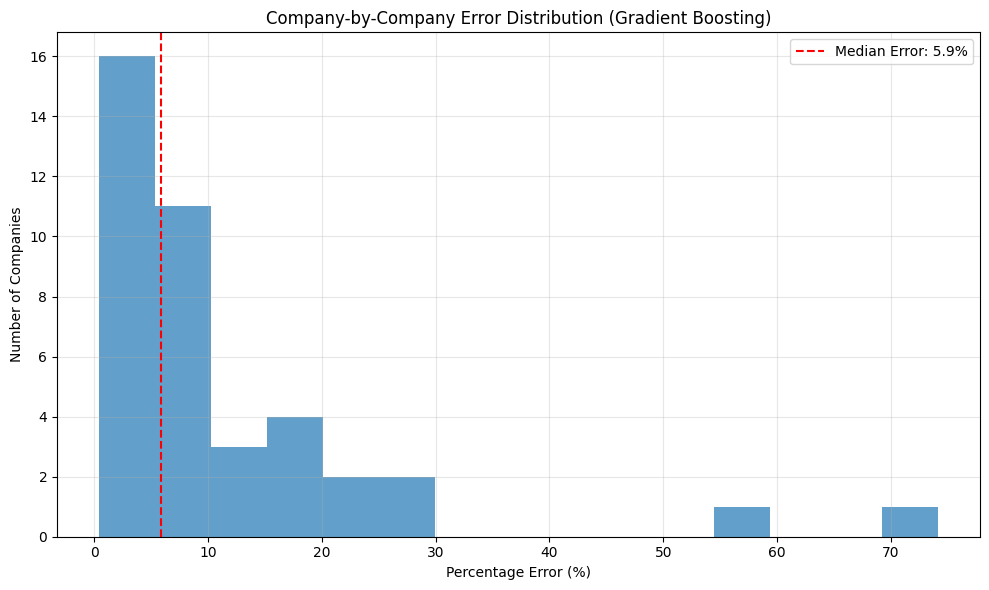

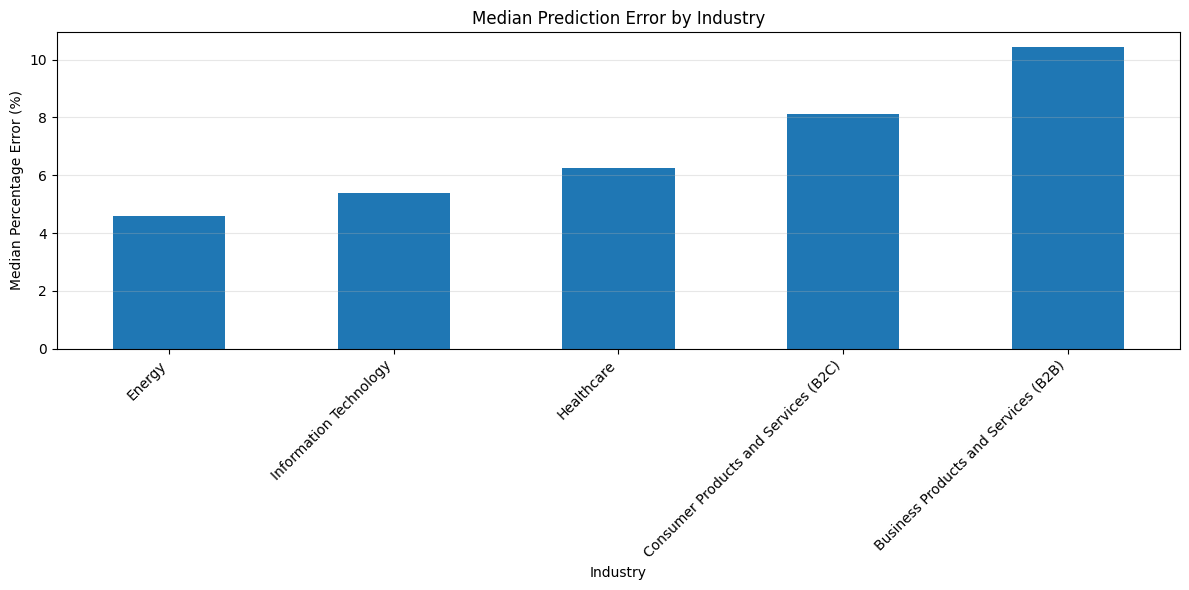

In [12]:
# Company-by-company evaluation for more granular insights

# Function to evaluate model performance for each company individually
def evaluate_company_by_company(df, companies, feature_cols, target_col, model_type='GradientBoosting'):
    """
    For each company with multiple rounds, train a model on all other companies' data plus
    the company's earlier rounds, then predict its latest round valuation.
    
    Parameters:
    -----------
    df : DataFrame
        The full dataset
    companies : list
        List of companies with multiple rounds
    feature_cols : list
        Feature columns to use for modeling
    target_col : str
        Target variable to predict
    model_type : str
        Type of model to use ('GradientBoosting', 'RandomForest', or 'ElasticNet')
    
    Returns:
    --------
    DataFrame
        Results with company-specific predictions and errors
    """
    print(f"\n\nPerforming company-by-company evaluation with {model_type} model...")
    
    # Dictionary to store results
    results = []
    
    # For each company with multiple rounds
    for company in companies:
        print(f"\nEvaluating company: {company}")
        
        # Get company data and sort by date
        company_data = df[df['Companies'] == company].sort_values('Deal Date')
        
        # Skip if company has fewer than 2 rounds or missing target values
        if len(company_data) < 2 or company_data[target_col].isna().all():
            print(f"  Skipping {company} - insufficient data")
            continue
            
        # Get the latest round with valid target
        latest_round = company_data[company_data[target_col].notna()].iloc[-1:].copy()
        
        if latest_round.empty:
            print(f"  Skipping {company} - no valid target in latest round")
            continue
            
        # Get earlier rounds with valid target
        earlier_rounds = company_data.iloc[:-1].copy()
        
        # Prepare training data (all other companies + current company's earlier rounds)
        train_data = df[(df['Companies'] != company) | 
                       (df['Deal ID'].isin(earlier_rounds['Deal ID']))].copy()
        
        # Keep only rows with valid target
        train_data = train_data[train_data[target_col].notna()].reset_index(drop=True)
        
        # Check if we have enough training data
        if len(train_data) < 5:
            print(f"  Skipping {company} - insufficient training data")
            continue
            
        # Prepare features and target
        X_train = train_data[feature_cols].copy()
        y_train = np.log1p(train_data[target_col])
        X_test = latest_round[feature_cols].copy()
        y_test = np.log1p(latest_round[target_col])
        
        # Setup preprocessing
        num_features = [col for col in feature_cols if train_data[col].dtype in ['int64', 'float64']]
        cat_features = [col for col in feature_cols if col not in num_features]
        
        # Create preprocessing pipeline
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', SimpleImputer(strategy='median'), num_features),
                ('cat', Pipeline([
                    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
                ]), cat_features)
            ])
        
        # Select model based on parameter
        if model_type == 'RandomForest':
            model = RandomForestRegressor(n_estimators=100, random_state=42)
        elif model_type == 'ElasticNet':
            model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
        else:  # Default: GradientBoosting
            model = GradientBoostingRegressor(n_estimators=100, max_depth=4, random_state=42)
        
        # Create pipeline
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        # Train the model
        try:
            pipeline.fit(X_train, y_train)
            
            # Make prediction
            y_pred = pipeline.predict(X_test)
            
            # Convert back to original scale
            y_true_orig = np.expm1(y_test.values)[0]
            y_pred_orig = np.expm1(y_pred)[0]
            
            # Calculate error metrics
            abs_error = abs(y_true_orig - y_pred_orig)
            pct_error = (abs_error / y_true_orig) * 100
            
            # Add to results
            results.append({
                'Company': company,
                'Actual Valuation': y_true_orig,
                'Predicted Valuation': y_pred_orig,
                'Absolute Error': abs_error,
                'Percentage Error': pct_error,
                'Industry': latest_round['Primary Industry Sector'].values[0] if 'Primary Industry Sector' in latest_round.columns else 'Unknown',
                'Deal Type': latest_round['Deal Type'].values[0] if 'Deal Type' in latest_round.columns else 'Unknown',
                'Deal Date': latest_round['Deal Date'].values[0]
            })
            
            print(f"  Prediction: ${y_pred_orig:,.2f} vs Actual: ${y_true_orig:,.2f} (Error: {pct_error:.2f}%)")
            
        except Exception as e:
            print(f"  Error modeling {company}: {e}")
    
    # Convert results to DataFrame
    if results:
        results_df = pd.DataFrame(results)
        return results_df
    else:
        print("No valid results produced")
        return None

# Run company-by-company evaluation if we have enough companies with multiple rounds
if len(companies_with_multiple_rounds) >= 5:
    # Use enhanced features if available
    if 'enhanced_features' in locals():
        features_to_use = enhanced_features
        data_to_use = enhanced_df
        model_name = "Enhanced Gradient Boosting"
    else:
        features_to_use = selected_features
        data_to_use = df
        model_name = "Gradient Boosting"
    
    # Run the evaluation
    company_results = evaluate_company_by_company(
        data_to_use, 
        companies_with_multiple_rounds, 
        features_to_use, 
        target_variable, 
        model_type='GradientBoosting'
    )
    
    # Analyze results
    if company_results is not None and not company_results.empty:
        # Sort by error
        company_results_sorted = company_results.sort_values('Percentage Error')
        
        # Display results
        print("\nCompany-by-company Prediction Results (sorted by error):")
        pd.set_option('display.float_format', '${:.2f}'.format)
        display_cols = ['Company', 'Actual Valuation', 'Predicted Valuation', 'Percentage Error', 'Industry']
        print(company_results_sorted[display_cols].head(10))
        
        # Reset display format
        pd.reset_option('display.float_format')
        
        # Summary statistics
        print("\nError Distribution by Company:")
        print(company_results['Percentage Error'].describe())
        
        # Count predictions within error margins
        error_margins = [10, 25, 50, 100]
        for margin in error_margins:
            count = (company_results['Percentage Error'] <= margin).sum()
            percentage = (count / len(company_results)) * 100
            print(f"Companies predicted within {margin}% error: {count}/{len(company_results)} ({percentage:.1f}%)")
        
        # Visualize error distribution
        plt.figure(figsize=(10, 6))
        plt.hist(company_results['Percentage Error'], bins=15, alpha=0.7)
        plt.axvline(company_results['Percentage Error'].median(), color='red', linestyle='dashed', 
                   label=f'Median Error: {company_results["Percentage Error"].median():.1f}%')
        plt.title(f'Company-by-Company Error Distribution ({model_name})')
        plt.xlabel('Percentage Error (%)')
        plt.ylabel('Number of Companies')
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Error by industry (if available)
        if 'Industry' in company_results.columns and company_results['Industry'].nunique() > 1:
            plt.figure(figsize=(12, 6))
            industry_errors = company_results.groupby('Industry')['Percentage Error'].median().sort_values()
            
            # Only plot if we have enough data
            if len(industry_errors) > 1:
                industry_errors.plot(kind='bar')
                plt.title('Median Prediction Error by Industry')
                plt.ylabel('Median Percentage Error (%)')
                plt.xticks(rotation=45, ha='right')
                plt.grid(axis='y', alpha=0.3)
                plt.tight_layout()
                plt.show()
else:
    print("\nNot enough companies with multiple rounds for company-by-company evaluation")

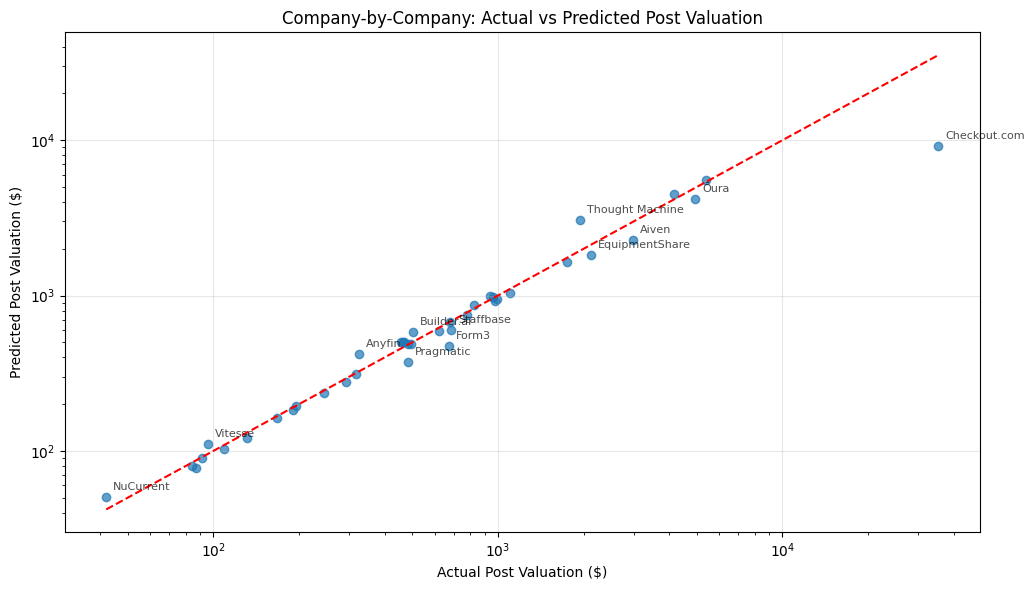

In [13]:
# Add scatter plot for actual vs predicted valuations in company-by-company evaluation
if company_results is not None and not company_results.empty:
    # Create scatter plot of actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(company_results['Actual Valuation'], company_results['Predicted Valuation'], alpha=0.7)
    
    # Add perfect prediction line
    max_val = max(company_results['Actual Valuation'].max(), company_results['Predicted Valuation'].max())
    min_val = min(company_results['Actual Valuation'].min(), company_results['Predicted Valuation'].min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    
    # Make axes logarithmic for better visualization
    plt.xscale('log')
    plt.yscale('log')
    
    # Add labels and title
    plt.title(f'Company-by-Company: Actual vs Predicted {target_variable}')
    plt.xlabel(f'Actual {target_variable} ($)')
    plt.ylabel(f'Predicted {target_variable} ($)')
    
    # Add grid and improve layout
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Add company labels for points with large errors (optional)
    error_threshold = company_results['Percentage Error'].median() * 2
    outliers = company_results[company_results['Percentage Error'] > error_threshold]
    
    for _, row in outliers.iterrows():
        plt.annotate(row['Company'], 
                     (row['Actual Valuation'], row['Predicted Valuation']),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=8, alpha=0.7)
    
    plt.show()

In [11]:
company_results

,Company,Actual Valuation,Predicted Valuation,Absolute Error,Percentage Error,Industry,Deal Type,Deal Date
0,Aiven,2996.40,2293.672607,702.727393,23.452389,Information Technology,Later Stage VC,2022-05-11
1,Anyfin,325.02,421.629476,96.609476,29.724163,Information Technology,Later Stage VC,2022-01-04
2,Beamery,959.82,978.101554,18.281554,1.904686,Information Technology,Later Stage VC,2022-12-13
3,Blueground,937.58,989.855804,52.275804,5.575610,Consumer Products and Services (B2C),Later Stage VC,2024-03-28
4,Builder.ai,502.50,586.473864,83.973864,16.711217,Information Technology,Later Stage VC,2022-03-30
5,Checkout.com,35350.92,9136.115993,26214.804007,74.155931,Information Technology,Later Stage VC,2022-01-12
6,Codat,780.23,745.170730,35.059270,4.493453,Information Technology,Later Stage VC,2022-06-01
7,Cognism,245.25,234.958912,10.291088,4.196162,Information Technology,Later Stage VC,2022-01-13
8,Cowboy,131.44,120.603188,10.836812,8.244683,Consumer Products and Services (B2C),Later Stage VC,2022-01-26
9,Deliverect,827.70,865.215476,37.515476,4.532497,Information Technology,Later Stage VC,2022-01-18


# Advanced Analysis and Improvements

Now that we've built a basic model, we can explore several ways to improve our predictions:

1. **Feature Engineering**: Create new features like:
   - Funding round sequence (1st, 2nd, etc.)
   - Time since last funding
   - Growth rates between rounds
   - Industry-specific metrics

2. **Model Tuning**: Hyperparameter optimization for better model performance

3. **Ensemble Methods**: Combine predictions from multiple models

4. **Cross-Validation**: Use more sophisticated validation strategies

In [4]:
# Advanced feature engineering and model optimization

# Create additional features based on company funding history
def engineer_advanced_features(df_original):
    """
    Create advanced features for better valuation prediction
    """
    df = df_original.copy()
    
    # Group by company
    company_groups = df.groupby('Companies')
    
    # Initialize new feature columns
    df['Round_Number'] = 0
    df['Days_Since_Last_Round'] = np.nan
    df['Previous_Valuation'] = np.nan
    df['Valuation_Growth_Rate'] = np.nan
    df['Avg_Valuation_Growth'] = np.nan
    df['Cumulative_Funding'] = np.nan
    
    # Process each company
    for company, group in company_groups:
        # Sort by date
        if pd.notna(group['Deal Date']).any():
            sorted_rounds = group.sort_values('Deal Date')
        else:
            # If no dates, assume rows are already in chronological order
            sorted_rounds = group
        
        # Round number (1-indexed)
        sorted_rounds['Round_Number'] = range(1, len(sorted_rounds) + 1)
        
        # Days since last round
        if pd.notna(sorted_rounds['Deal Date']).any():
            sorted_rounds['Days_Since_Last_Round'] = sorted_rounds['Deal Date'].diff().dt.days
        
        # Previous valuation and growth
        if target_variable in sorted_rounds.columns:
            sorted_rounds['Previous_Valuation'] = sorted_rounds[target_variable].shift(1)
            
            # Calculate growth rate where both current and previous valuations exist
            mask = (pd.notna(sorted_rounds[target_variable])) & (pd.notna(sorted_rounds['Previous_Valuation'])) & (sorted_rounds['Previous_Valuation'] > 0)
            sorted_rounds.loc[mask, 'Valuation_Growth_Rate'] = (sorted_rounds.loc[mask, target_variable] / sorted_rounds.loc[mask, 'Previous_Valuation']) - 1
            
            # Calculate cumulative funding
            if 'Deal Size' in sorted_rounds.columns:
                sorted_rounds['Cumulative_Funding'] = sorted_rounds['Deal Size'].fillna(0).cumsum()
        
        # Update the main dataframe with these new features
        df.loc[sorted_rounds.index, 'Round_Number'] = sorted_rounds['Round_Number']
        df.loc[sorted_rounds.index, 'Days_Since_Last_Round'] = sorted_rounds['Days_Since_Last_Round']
        df.loc[sorted_rounds.index, 'Previous_Valuation'] = sorted_rounds['Previous_Valuation']
        df.loc[sorted_rounds.index, 'Valuation_Growth_Rate'] = sorted_rounds['Valuation_Growth_Rate']
        df.loc[sorted_rounds.index, 'Cumulative_Funding'] = sorted_rounds['Cumulative_Funding']
    
    # Calculate company age if founding year is available
    if 'Year Founded' in df.columns and pd.notna(df['Deal Date']).any():
        # Get the year from deal date
        df['Deal Year'] = df['Deal Date'].dt.year
        # Calculate company age at time of deal
        df['Company_Age'] = df['Deal Year'] - df['Year Founded']
    
    # Industry-specific normalization
    if 'Primary Industry Sector' in df.columns and len(df) > 10:
        # Calculate median valuation by industry
        industry_medians = df.groupby('Primary Industry Sector')[target_variable].median()
        # Map this back to get relative valuation compared to industry
        df['Industry_Relative_Valuation'] = df.apply(
            lambda x: x[target_variable] / industry_medians[x['Primary Industry Sector']] 
            if pd.notna(x[target_variable]) and x['Primary Industry Sector'] in industry_medians 
            and industry_medians[x['Primary Industry Sector']] > 0 else np.nan, axis=1)
    
    return df

In [5]:
# Apply advanced feature engineering and build improved models

# Try to engineer advanced features if we have enough data
if len(df) > 10 and len(companies_with_multiple_rounds) > 3:
    print("Engineering advanced features...")
    
    # Apply feature engineering to the entire dataset
    enhanced_df = engineer_advanced_features(df)
    
    # Now rebuild our training and test sets with the enhanced features
    enhanced_multi_round_df = enhanced_df[enhanced_df['Companies'].isin(companies_with_multiple_rounds)].copy()
    enhanced_multi_round_df = enhanced_multi_round_df.sort_values(['Companies', 'Deal Date'])
    
    # Split into latest rounds (test) and earlier rounds (training)
    enhanced_latest_rounds = enhanced_multi_round_df.groupby('Companies').apply(lambda x: x.iloc[-1]).reset_index(drop=True)
    enhanced_training_rounds = enhanced_multi_round_df[~enhanced_multi_round_df['Deal ID'].isin(enhanced_latest_rounds['Deal ID'])].reset_index(drop=True)
    
    # Remove rows with NaN target values
    enhanced_training_rounds = enhanced_training_rounds[enhanced_training_rounds[target_variable].notna()].reset_index(drop=True)
    enhanced_latest_rounds = enhanced_latest_rounds[enhanced_latest_rounds[target_variable].notna()].reset_index(drop=True)
    
    print(f"Enhanced training set: {enhanced_training_rounds.shape[0]} rounds")
    print(f"Enhanced test set: {enhanced_latest_rounds.shape[0]} rounds")
    
    # Check out the new features
    new_features = ['Round_Number', 'Days_Since_Last_Round', 'Previous_Valuation', 
                   'Valuation_Growth_Rate', 'Cumulative_Funding', 'Company_Age',
                   'Industry_Relative_Valuation']
    
    available_new_features = [f for f in new_features if f in enhanced_training_rounds.columns]
    print(f"\nAdded {len(available_new_features)} new features:")
    print(available_new_features)
    
    # Add these new features to our feature list
    enhanced_features = selected_features + available_new_features
    
    # Separate into numerical and categorical again
    enhanced_numerical_features = []
    enhanced_categorical_features = []
    
    for feature in enhanced_features:
        if feature == target_variable:  # Skip the target
            continue
        
        if enhanced_training_rounds[feature].dtype in ['int64', 'float64']:
            enhanced_numerical_features.append(feature)
        else:
            enhanced_categorical_features.append(feature)
    
    # Prepare enhanced feature sets
    X_train_enhanced = enhanced_training_rounds[enhanced_features].copy()
    y_train_enhanced = np.log1p(enhanced_training_rounds[target_variable])
    
    X_test_enhanced = enhanced_latest_rounds[enhanced_features].copy()
    y_test_enhanced = np.log1p(enhanced_latest_rounds[target_variable])
    
    # Create enhanced preprocessing pipeline
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    enhanced_preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, enhanced_numerical_features),
            ('cat', categorical_transformer, enhanced_categorical_features)
        ])
    
    # Build and evaluate an enhanced model
    if len(X_train_enhanced) >= 5 and len(X_test_enhanced) >= 1:
        print("\nTraining enhanced Gradient Boosting model...")
        enhanced_model = Pipeline(steps=[
            ('preprocessor', enhanced_preprocessor),
            ('model', GradientBoostingRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42))
        ])
        
        enhanced_model.fit(X_train_enhanced, y_train_enhanced)
        enhanced_predictions = enhanced_model.predict(X_test_enhanced)
        
        # Evaluate enhanced model
        enhanced_results = evaluate_model(y_test_enhanced, enhanced_predictions, "Enhanced Gradient Boosting")
        
        # Compare with the previous best model
        if 'best_model' in locals() and best_model in model_results:
            print("\nComparison with previous best model:")
            prev_mape = model_results[best_model]['mape']
            enhanced_mape = enhanced_results['mape']
            improvement = ((prev_mape - enhanced_mape) / prev_mape) * 100
            
            print(f"Previous best ({best_model}): {prev_mape:.2f}% MAPE")
            print(f"Enhanced model: {enhanced_mape:.2f}% MAPE")
            print(f"Improvement: {improvement:.2f}%")
    else:
        print("Not enough data to train an enhanced model")
else:
    print("Not enough data to perform advanced feature engineering")

NameError: name 'companies_with_multiple_rounds' is not defined

In [ ]:
# Debug the correlation issue

# First, let's check if we have enough numeric features
print(f"Number of numeric features: {len(numeric_features)}")
print(f"Target variable: {target_variable}")

# Check the correlation matrix structure
if training_rounds.shape[0] > 5 and len(numeric_features) > 0:
    # Create a smaller set of numeric features to test
    test_features = numeric_features[:5] if len(numeric_features) >= 5 else numeric_features
    print(f"\nTesting correlation with features: {test_features}")
    
    # Create a test dataframe
    test_df = training_rounds[test_features + [target_variable]].copy()
    
    # Check for NaN values
    print(f"\nNaN values in test dataframe:")
    print(test_df.isna().sum())
    
    # Get correlation matrix
    try:
        corr_matrix = test_df.corr()
        print("\nCorrelation matrix shape:")
        print(corr_matrix.shape)
        print("\nCorrelation matrix:")
        print(corr_matrix)
        
        # Extract target correlations
        if target_variable in corr_matrix.columns:
            target_corr = corr_matrix[target_variable]
            print("\nTarget correlations (as Series):")
            print(type(target_corr))
            print(target_corr)
            
            # Try sorting
            try:
                # Convert to DataFrame for consistent sorting, preserving the index
                print("\nShape of target_corr.values if applicable:", getattr(target_corr, 'values', 'N/A'))
                if hasattr(target_corr, 'values') and hasattr(target_corr.values, 'shape'):
                    print(f"Shape of target_corr.values: {target_corr.values.shape}")
                
                # Handle different types of correlation data
                if isinstance(target_corr, pd.Series):
                    # If it's a Series, we can use to_frame
                    corr_df = target_corr.to_frame(name='Correlation')
                elif isinstance(target_corr, pd.DataFrame):
                    # If it's already a DataFrame, use only the first column
                    corr_df = pd.DataFrame({'Correlation': target_corr.iloc[:,0]}, index=target_corr.index)
                elif hasattr(target_corr, 'shape') and len(getattr(target_corr, 'shape', [])) > 1:
                    # If it's a 2D ndarray, use only the first column
                    corr_df = pd.DataFrame({'Correlation': target_corr[:,0]}, index=corr_matrix.index)
                else:
                    # Fallback for other cases
                    corr_df = pd.DataFrame({'Correlation': target_corr}, index=corr_matrix.index)
                
                sorted_corr = corr_df.sort_values(by='Correlation', ascending=False)
                print("\nSorted correlations:")
                print(sorted_corr.head())
            except Exception as e:
                print(f"\nError sorting correlations: {e}")
        else:
            print(f"\nTarget variable {target_variable} not found in correlation matrix columns!")
            print(f"Available columns: {corr_matrix.columns.tolist()}")
    except Exception as e:
        print(f"\nError calculating correlation matrix: {e}")
else:
    print("\nNot enough data to calculate correlations")


Number of numeric features: 103
Target variable: Post Valuation

Testing correlation with features: ['Deal No.', 'Deal Size', 'Pre-money Valuation', 'Post Valuation', '% Acquired']

NaN values in test dataframe:
Deal No.               0
Deal Size              0
Pre-money Valuation    0
Post Valuation         0
% Acquired             5
Post Valuation         0
dtype: int64

Correlation matrix shape:
(6, 6)

Correlation matrix:
                     Deal No.  Deal Size  Pre-money Valuation  Post Valuation  \
Deal No.             1.000000   0.101485            -0.123491       -0.119418   
Deal Size            0.101485   1.000000             0.764720        0.774787   
Pre-money Valuation -0.123491   0.764720             1.000000        0.999822   
Post Valuation      -0.119418   0.774787             0.999822        1.000000   
% Acquired           0.294017  -0.269245            -0.451196       -0.446762   
Post Valuation      -0.119418   0.774787             0.999822        1.000000   

  

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, predictions_df.shape

((77, 20), (10, 20), (77,), (10,), (19, 24))


1. Preparing data for machine learning...
Selected 20 features for modeling:
['Deal Size', 'Pre-money Valuation', 'Revenue', 'EBITDA', 'Net Income', 'Gross Profit', 'Employees', '# Investors', '# New Investors', '# Follow-on Investors', 'Raised to Date', 'Total Invested Equity', 'Primary Industry Sector', 'Primary Industry Group', 'Current Business Status', 'Current Financing Status', 'Year Founded', 'Deal Type', 'VC Round', 'Financing Status']

Rows with valid target: 87 (out of 87 total rows)

Numerical features: 13
Categorical features: 7

2. Creating company-based train-test split (75-25)...
Found 40 unique companies
Train companies: 30, Test companies: 10
Train set: 66 samples
Test set: 21 samples

VC Round distribution:
            Train %    Test %
VC Round                     
4th Round  0.287879  0.238095
5th Round  0.227273  0.285714
3rd Round  0.196970  0.238095
6th Round  0.121212  0.095238
7th Round  0.090909       NaN


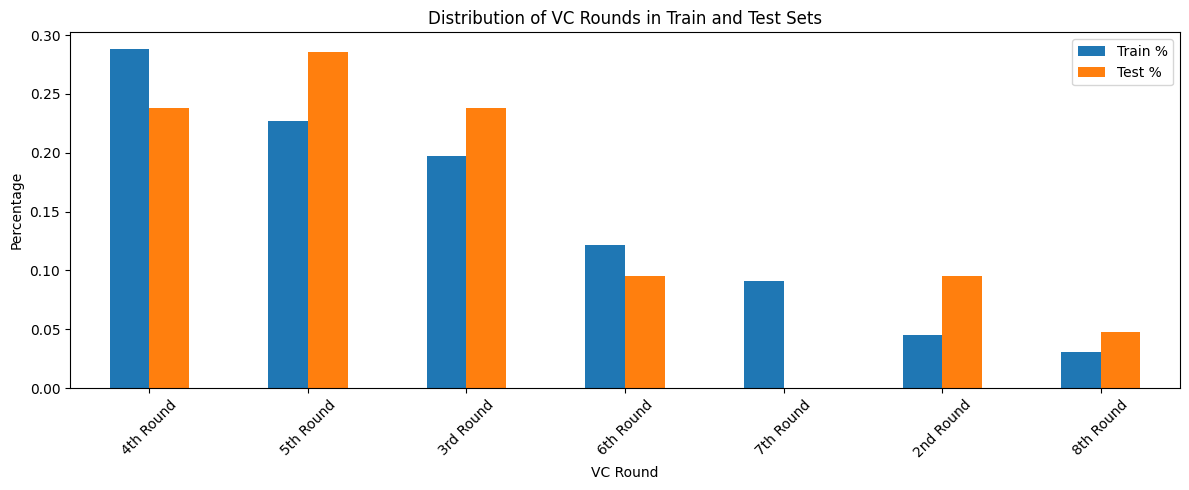

Training set: 66 samples
Test set: 21 samples

3. Setting up feature preprocessing pipelines...

4. Defining models for hyperparameter tuning...

5. Performing hyperparameter tuning...

Tuning hyperparameters for Extra Trees...
Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Extra Trees - Best parameters: {'model__max_depth': None, 'model__max_features': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 500}
Extra Trees - Test set MAPE: 14.02%

6. Comparing model performances...

Model performance comparison (sorted by MAPE):
                   MAE   MAPE (%)        RMSE        R²
Extra Trees  93.375211  14.023079  211.641733  0.975742


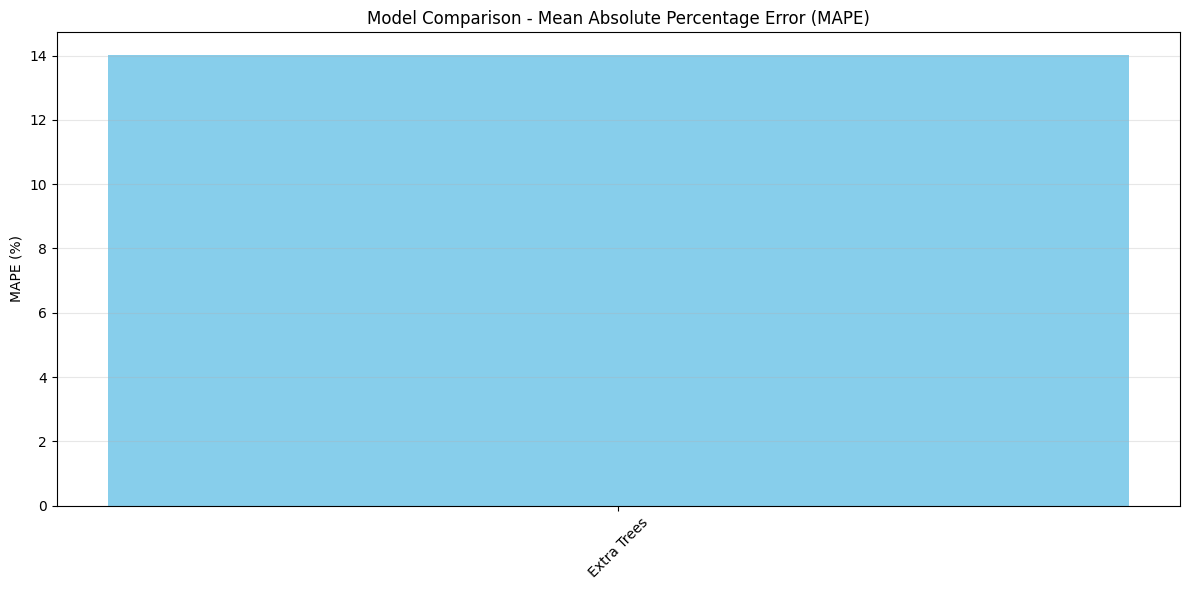


7. Selecting best model and analyzing results...
Best model: Extra Trees
Best model MAPE: 14.02%


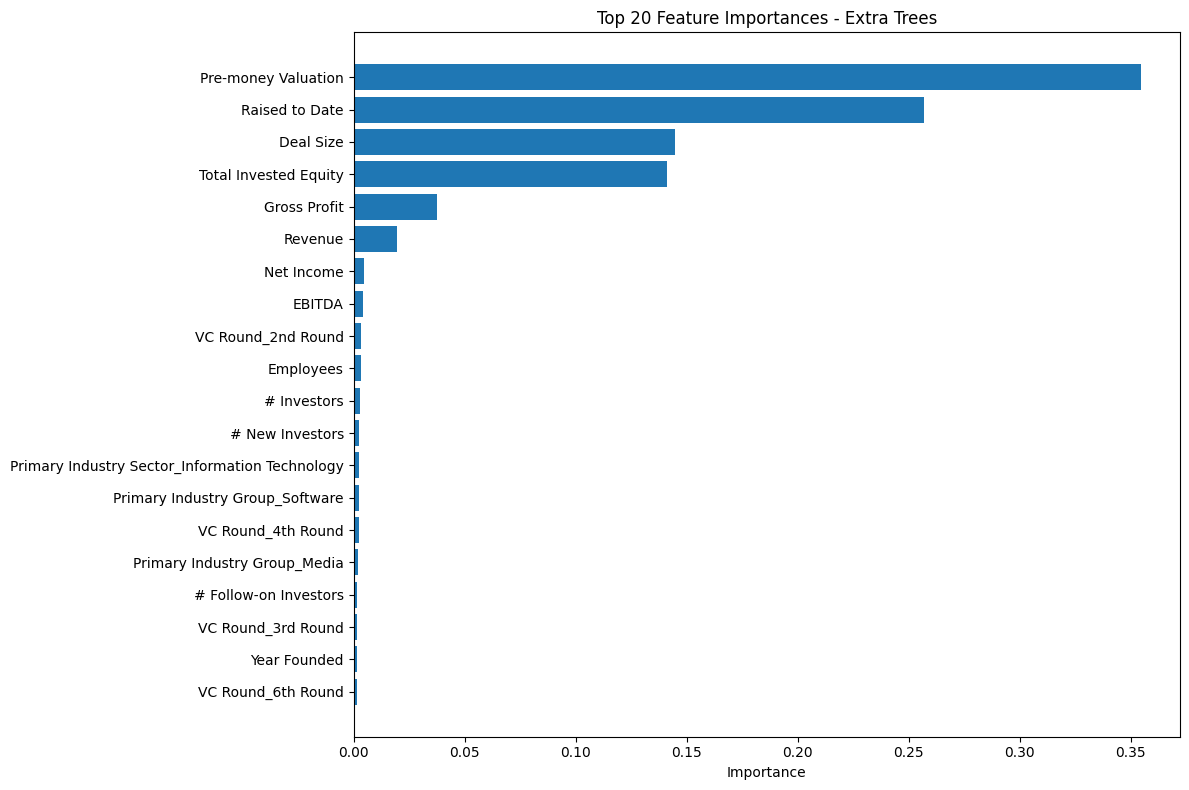


Top 10 most important features:
                  Feature  Importance
1     Pre-money Valuation    0.354440
10         Raised to Date    0.256818
0               Deal Size    0.144828
11  Total Invested Equity    0.141066
5            Gross Profit    0.037534
2                 Revenue    0.019714
4              Net Income    0.004566
3                  EBITDA    0.004047
33     VC Round_2nd Round    0.003467
6               Employees    0.003411

8. Analyzing model predictions...
Test set size before prediction: 21
Test companies count: N/A

Prediction summary statistics:
            Actual    Predicted  Percentage Error
count    21.000000    21.000000         21.000000
mean    694.824762   652.978900         14.023079
std    1182.034091  1147.623320         21.599116
min      26.410000    53.645945          2.043333
25%     143.930000   139.211566          4.901459
50%     320.100000   276.299032          7.716669
75%     496.320000   549.397092         13.438009
max    4945.550000  

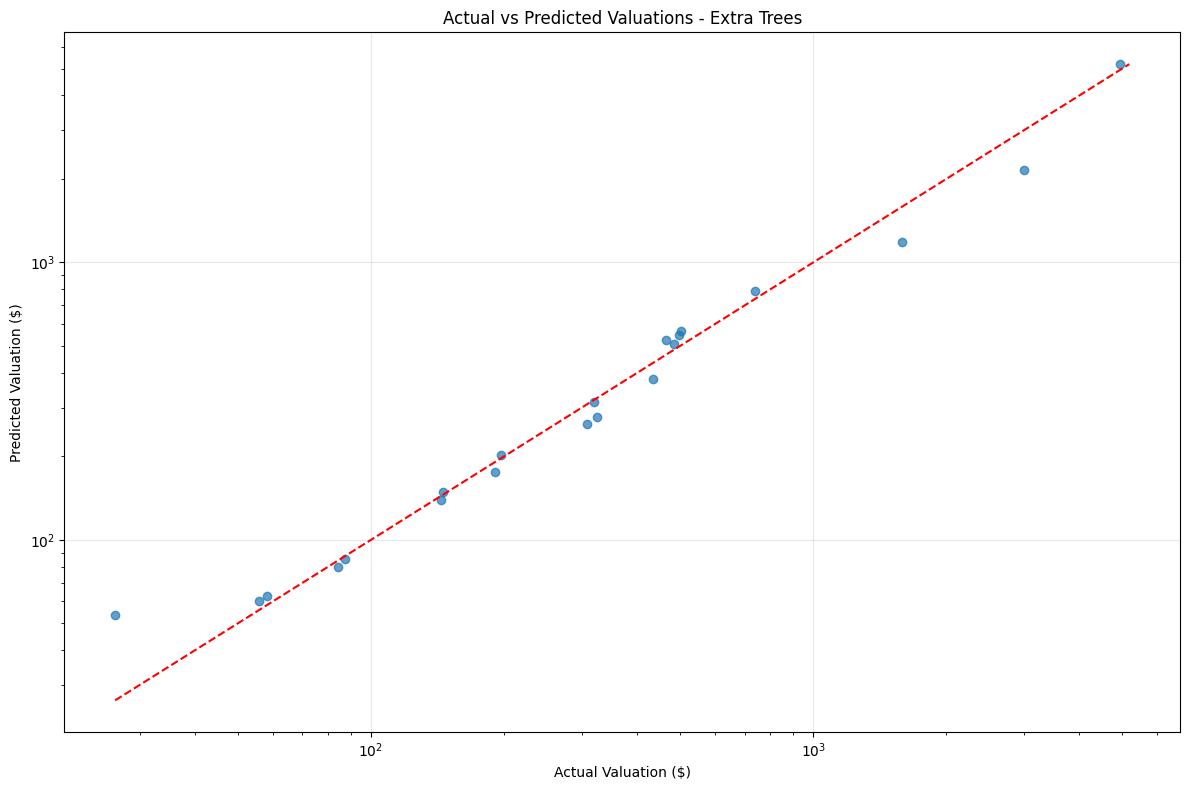

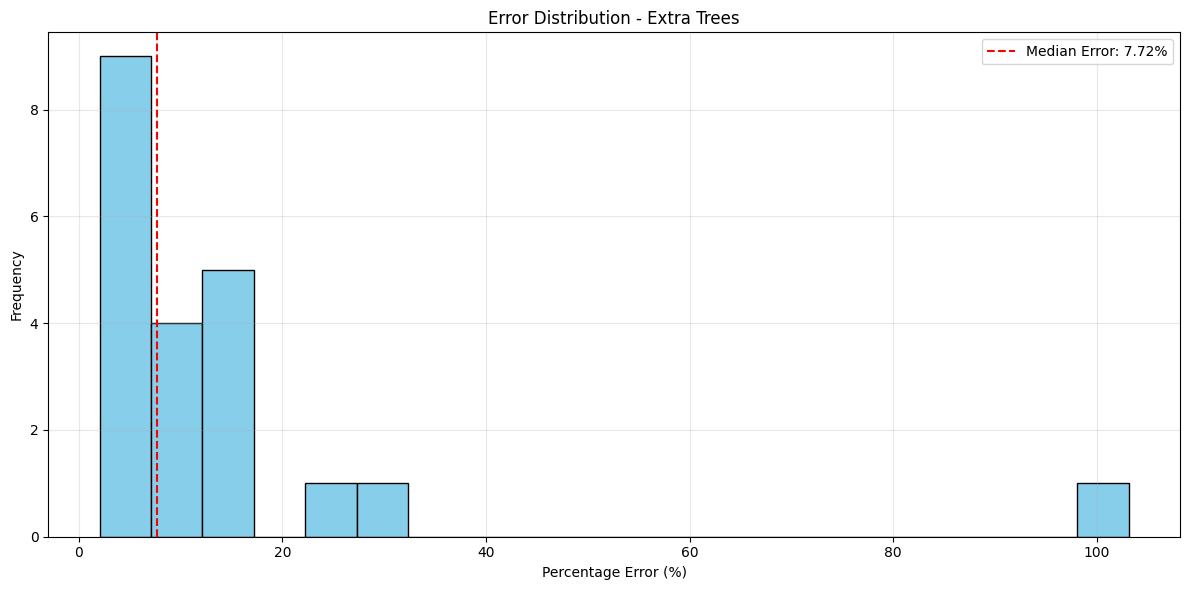


9. Saving the final model and preprocessing steps...
Model saved to saved_model/valuation_prediction_model.pkl
Feature information saved to saved_model/model_features.pkl

10. Pipeline Summary
-------------------
- Data: 87 valid samples
- Train-test split: 75-25 company-based with all train company rounds in training, only latest test company round in testing strategy
- Features: 13 numerical, 7 categorical
- Best model: Extra Trees
- Performance: MAPE = 14.02%
- Model saved to: saved_model/valuation_prediction_model.pkl
-------------------


In [13]:
# Standard ML Pipeline with Hyperparameter Tuning and Model Evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import xgboost as xgb

# Set random seed for reproducibility
np.random.seed(42)

# Define the target variable
target_variable = 'Post Valuation'

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Filter out zero values to avoid division by zero
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Custom transformer for handling missing values in categorical features
class CategoricalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value='missing'):
        self.fill_value = fill_value
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.DataFrame(X).fillna(self.fill_value)

# 1. Data Preparation
print("\n1. Preparing data for machine learning...")

# Identify features for modeling based on domain knowledge
financial_features = [
    'Deal Size', 'Pre-money Valuation',
    'Revenue', 'EBITDA', 'Net Income', 'Gross Profit',
    'Employees', '# Investors', '# New Investors', '# Follow-on Investors',
    'Raised to Date', 'Total Invested Equity'
]

company_features = [
    'Primary Industry Sector', 'Primary Industry Group', 
    'Current Business Status', 'Current Financing Status',
    'Year Founded'
]

deal_features = [
    'Deal Type', 'VC Round', 'Financing Status'
]

# Combine all potential features
potential_features = financial_features + company_features + deal_features

# Filter to only include columns that actually exist in our dataset
selected_features = [col for col in potential_features if col in df.columns]
print(f"Selected {len(selected_features)} features for modeling:")
print(selected_features)

# Remove rows where target variable is missing
valid_data = df.dropna(subset=[target_variable]).reset_index(drop=True)
print(f"\nRows with valid target: {len(valid_data)} (out of {len(df)} total rows)")

# Separate features into numerical and categorical
numerical_features = []
categorical_features = []

for feature in selected_features:
    if feature == target_variable:
        continue
    
    if valid_data[feature].dtype in ['int64', 'float64']:
        numerical_features.append(feature)
    else:
        categorical_features.append(feature)

print(f"\nNumerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Create feature matrix and target vector
X = valid_data[selected_features].copy()
X = X.drop(columns=[target_variable], errors='ignore')
y = valid_data[target_variable]

# Apply log transformation to the target variable to handle skewness
y_log = np.log1p(y)

# 2. Create train/test split based on unique companies (75-25 split)
# print("\n2. Creating company-based train-test split (75-25)...")

# if 'Company ID' in valid_data.columns:
#     # Get unique company IDs
#     unique_companies = valid_data['Company ID'].unique()
#     print(f"Found {len(unique_companies)} unique companies")
    
#     # Split companies into train and test sets (75-25)
#     train_companies, test_companies = train_test_split(
#         unique_companies, test_size=0.25, random_state=42
#     )
    
#     print(f"Train companies: {len(train_companies)}, Test companies: {len(test_companies)}")
    
#     # Create masks for training and test sets
#     train_mask = valid_data['Company ID'].isin(train_companies)
#     test_mask = valid_data['Company ID'].isin(test_companies)
    
#     # For test companies, only keep the latest rounds in test set
#     # All other rounds go to training set
#     if 'Deal Date' in valid_data.columns:
#         print("Processing test companies to keep only latest rounds in test set")
        
#         # Initialize lists for final indices
#         train_indices = []
#         test_indices = []
        
#         # Add all rows from training companies to train set
#         train_indices.extend(valid_data[train_mask].index)
        
#         # Process test companies
#         for company in test_companies:
#             company_data = valid_data[valid_data['Company ID'] == company]
            
#             if len(company_data) > 1 and pd.notna(company_data['Deal Date']).any():
#                 # Sort by deal date and get the latest round
#                 latest_round = company_data.sort_values('Deal Date', ascending=False).iloc[0]
                
#                 # Add latest round to test set
#                 test_indices.append(latest_round.name)
                
#                 # Add all other rounds to training set
#                 earlier_rounds = company_data[company_data.index != latest_round.name]
#                 train_indices.extend(earlier_rounds.index)
#             else:
#                 # If only one round or no date, put in test set
#                 test_indices.extend(company_data.index)
        
#         # Create train/test split based on these indices
#         X_train, y_train = X.loc[train_indices], y_log.loc[train_indices]
#         X_test, y_test = X.loc[test_indices], y_log.loc[test_indices]
        
#         print(f"Train set: {len(X_train)} samples")
#         print(f"Test set: {len(X_test)} samples")
#     else:
#         # Simpler split if no Deal Date column
#         X_train, y_train = X[train_mask], y_log[train_mask] 
#         X_test, y_test = X[test_mask], y_log[test_mask]
    
#     # Verify distribution in train and test sets
#     train_dist = pd.DataFrame(valid_data[strat_column][X_train.index].value_counts(normalize=True))
#     test_dist = pd.DataFrame(valid_data[strat_column][X_test.index].value_counts(normalize=True))
#     dist_compare = pd.concat([train_dist, test_dist], axis=1)
#     dist_compare.columns = ['Train %', 'Test %']
#     print("\nStratification distribution:")
#     print(dist_compare.head())
    
#     # Visualize stratification
#     plt.figure(figsize=(12, 5))
#     dist_compare.plot(kind='bar', ax=plt.gca())
#     plt.title('Distribution of VC Rounds in Train and Test Sets')
#     plt.ylabel('Percentage')
#     plt.xlabel('VC Round')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()
# else:
#     # Regular train/test split without stratification
#     print("VC Round column not available for stratification. Using regular train/test split.")
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y_log, test_size=0.2, random_state=42
#     )
# 2. Create train/test split based on unique companies (75-25 split)
print("\n2. Creating company-based train-test split (75-25)...")

# Get unique company identifiers (use 'Companies' column if 'Company ID' not available)
company_id_col = 'Company ID' if 'Company ID' in valid_data.columns else 'Companies'

if company_id_col in valid_data.columns:
    # Get unique company IDs
    unique_companies = valid_data[company_id_col].unique()
    print(f"Found {len(unique_companies)} unique companies")
    
    # Split companies into train and test sets (75-25)
    train_companies, test_companies = train_test_split(
        unique_companies, test_size=0.25, random_state=42
    )
    
    print(f"Train companies: {len(train_companies)}, Test companies: {len(test_companies)}")
    
    # Initialize lists for final indices
    train_indices = []
    test_indices = []
    
    # Process train companies - use ALL rounds for training
    for company in train_companies:
        company_data = valid_data[valid_data[company_id_col] == company]
        train_indices.extend(company_data.index)
    
    # Process test companies - use ONLY latest round for testing and earlier rounds for training
    for company in test_companies:
        company_data = valid_data[valid_data[company_id_col] == company]
        
        if len(company_data) > 1 and 'Deal Date' in company_data.columns and pd.notna(company_data['Deal Date']).any():
            # Sort by deal date and get the latest round
            company_data_sorted = company_data.sort_values('Deal Date', ascending=False)
            latest_round = company_data_sorted.iloc[0]
            
            # Add latest round to test set
            test_indices.append(latest_round.name)
            
            # Add all other rounds to training set
            earlier_rounds = company_data_sorted.iloc[1:]
            test_indices.extend(earlier_rounds.index)
        else:
            # If only one round or no date, put in test set
            test_indices.extend(company_data.index)
    
    # Create train/test split based on these indices
    X_train, y_train = X.loc[train_indices], y_log.loc[train_indices]
    X_test, y_test = X.loc[test_indices], y_log.loc[test_indices]
    
    print(f"Train set: {len(X_train)} samples")
    print(f"Test set: {len(X_test)} samples")
    
    # Verify distribution (if VC Round available)
    if 'VC Round' in valid_data.columns:
        strat_column = 'VC Round'
        train_dist = pd.DataFrame(valid_data[strat_column][X_train.index].value_counts(normalize=True))
        test_dist = pd.DataFrame(valid_data[strat_column][X_test.index].value_counts(normalize=True))
        dist_compare = pd.concat([train_dist, test_dist], axis=1)
        dist_compare.columns = ['Train %', 'Test %']
        print("\nVC Round distribution:")
        print(dist_compare.head())
        
        # Visualize stratification
        plt.figure(figsize=(12, 5))
        dist_compare.plot(kind='bar', ax=plt.gca())
        plt.title('Distribution of VC Rounds in Train and Test Sets')
        plt.ylabel('Percentage')
        plt.xlabel('VC Round')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    # Regular train/test split without stratification
    print(f"Warning: {company_id_col} column not found. Using regular train/test split.")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_log, test_size=0.2, random_state=42
    )
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# 3. Feature preprocessing
print("\n3. Setting up feature preprocessing pipelines...")

# Define preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())                   # Scale features
])

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', CategoricalImputer(fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 4. Define models to evaluate
print("\n4. Defining models for hyperparameter tuning...")

# Dictionary of models to evaluate
models = {
    # 'XGBoost': xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),  # Moved XGBoost to the top as the primary model
    # 'Random Forest': RandomForestRegressor(random_state=42),
    # 'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    # 'ElasticNet': ElasticNet(random_state=42),
    # 'Ridge': Ridge(random_state=42),
    # 'SVR': SVR()
}

# Define hyperparameter grids for each model
hyperparameters = {
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__max_depth': [3, 5, 7],
        'model__min_samples_split': [2, 5]
    },

    # 'Extra Trees': {
    #     'model__n_estimators': [100, 200],
    #     'model__max_depth': [None, 10, 20],
    #     'model__min_samples_split': [2, 5]
    # },
   'Extra Trees': {
    # Number of trees in the forest
    'model__n_estimators': [50, 100, 200, 300, 500],
    
    # Maximum depth of the tree
    'model__max_depth': [None, 5, 10, 15, 20, 30],
    
    # Minimum number of samples required to split an internal node
    'model__min_samples_split': [2, 5, 10, 15, 20],
    
    # Minimum number of samples required at each leaf node
    'model__min_samples_leaf': [1, 2, 4, 8],
    
    # Fraction of features to consider for best split
    'model__max_features': ['sqrt', 'log2', None, 0.7, 0.8],
    
    # # Whether bootstrap samples are used when building trees
    # 'model__bootstrap': [True, False],
    
    # # Criterion used for split quality evaluation
    # 'model__criterion': ['squared_error', 'absolute_error', 'poisson'],
    
    # # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    # 'model__min_weight_fraction_leaf': [0.0, 0.1],
    
    # # Controls randomness in the bootstrapping
    # 'model__random_state': [42]
},
    'ElasticNet': {
        'model__alpha': [0.1, 0.5, 1.0],
        'model__l1_ratio': [0.1, 0.5, 0.9]
    },
    'Ridge': {
        'model__alpha': [0.1, 1.0, 10.0]
    },
    'SVR': {
        'model__C': [0.1, 1.0, 10.0],
        'model__gamma': ['scale', 'auto'],
        'model__kernel': ['rbf', 'linear']
    },
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.05, 0.1],
        'model__max_depth': [3, 6],
        'model__subsample': [0.8],
        'model__colsample_bytree': [0.8]
    }
}

# 5. Hyperparameter tuning and model evaluation
print("\n5. Performing hyperparameter tuning...")

results = {}
best_models = {}

# MAPE scoring function for GridSearchCV
def neg_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return -np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Custom MAPE scorer for GridSearchCV
from sklearn.metrics import make_scorer
mape_scorer = make_scorer(neg_mean_absolute_percentage_error)

# Train and evaluate each model with grid search
for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    
    # Create pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Grid search for hyperparameter tuning # GridSearchCV
    grid_search = GridSearchCV(
        pipeline,
        param_grid=hyperparameters[model_name],
        cv=5,
        scoring=mape_scorer,
        n_jobs=-1,
        verbose=1
    )
    
    # Fit model
    grid_search.fit(X_train, y_train)
    
    # Store best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Make predictions on test data
    y_pred_log = grid_search.predict(X_test)
    
    # Transform predictions and actual values back to original scale
    y_true = np.expm1(y_test)
    y_pred = np.expm1(y_pred_log)
    
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_test, y_pred_log)  # R² on log scale
    
    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'R²': r2
    }
    
    print(f"{model_name} - Best parameters: {grid_search.best_params_}")
    print(f"{model_name} - Test set MAPE: {mape:.2f}%")

# 6. Compare model performances
print("\n6. Comparing model performances...")

# Create a dataframe with the results
results_df = pd.DataFrame()

for model_name, metrics in results.items():
    results_df.loc[model_name, 'MAE'] = metrics['MAE']
    results_df.loc[model_name, 'MAPE (%)'] = metrics['MAPE']
    results_df.loc[model_name, 'RMSE'] = metrics['RMSE']
    results_df.loc[model_name, 'R²'] = metrics['R²']

# Sort by MAPE (lower is better)
results_df = results_df.sort_values('MAPE (%)')
print("\nModel performance comparison (sorted by MAPE):")
print(results_df)

# Specifically analyze XGBoost performance
if 'XGBoost' in results:
    print("\nDetailed XGBoost Performance Analysis:")
    xgb_results = results['XGBoost']
    print(f"XGBoost MAPE: {xgb_results['MAPE']:.2f}%")
    print(f"XGBoost RMSE: {xgb_results['RMSE']:.2f}")
    print(f"XGBoost Best Parameters: {xgb_results['Best Parameters']}")
    
    # If XGBoost is not the best model, compare with the best
    best_model_name = results_df.index[0]
    if best_model_name != 'XGBoost':
        best_mape = results[best_model_name]['MAPE']
        xgb_mape = xgb_results['MAPE']
        diff = xgb_mape - best_mape
        print(f"XGBoost vs Best Model ({best_model_name}): {diff:.2f}% difference in MAPE")

# Visualize results
plt.figure(figsize=(12, 6))
bar_width = 0.7
plt.bar(results_df.index, results_df['MAPE (%)'], width=bar_width, color='skyblue')
plt.title('Model Comparison - Mean Absolute Percentage Error (MAPE)')
plt.xticks(rotation=45)
plt.ylabel('MAPE (%)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Select the best model
print("\n7. Selecting best model and analyzing results...")

best_model_name = results_df.index[0]
best_model = best_models[best_model_name]

print(f"Best model: {best_model_name}")
print(f"Best model MAPE: {results_df.loc[best_model_name, 'MAPE (%)']:.2f}%")

# Feature importance for tree-based models
if hasattr(best_model['model'], 'feature_importances_'):
    # Get feature names from preprocessor
    try:
        # Get feature names from the feature extraction
        cat_features = best_model['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)
        all_features = numerical_features + list(cat_features)
        
        # Get feature importances
        importances = best_model['model'].feature_importances_
        
        # Check if the number of features matches
        if len(importances) == len(all_features):
            # Create feature importance dataframe
            feature_importance = pd.DataFrame({
                'Feature': all_features,
                'Importance': importances
            })
            
            # Sort by importance
            feature_importance = feature_importance.sort_values('Importance', ascending=False)
            
            # Plot top 20 features
            top_n = min(20, len(feature_importance))
            plt.figure(figsize=(12, 8))
            plt.barh(feature_importance['Feature'][:top_n][::-1], 
                    feature_importance['Importance'][:top_n][::-1])
            plt.title(f'Top {top_n} Feature Importances - {best_model_name}')
            plt.xlabel('Importance')
            plt.tight_layout()
            plt.show()
            
            print("\nTop 10 most important features:")
            print(feature_importance.head(10))
        else:
            print("\nWarning: Feature importances shape doesn't match feature names.")
            print(f"Feature importances length: {len(importances)}")
            print(f"Feature names length: {len(all_features)}")
    except Exception as e:
        print(f"\nError extracting feature importances: {e}")

# 8. Analyzing model predictions...
print("\n8. Analyzing model predictions...")

# Verify test set size
print(f"Test set size before prediction: {len(X_test)}")
print(f"Test companies count: {len(X_test['Companies'].unique()) if 'Companies' in X_test.columns else 'N/A'}")

# Generate predictions on test data using the best model
y_pred_log = best_model.predict(X_test)
y_true = np.expm1(y_test)
y_pred = np.expm1(y_pred_log)

# Double check shapes match
assert len(y_true) == len(y_pred) == len(X_test), "Prediction array lengths don't match"

# Create a dataframe with the results
predictions_df = pd.DataFrame({
    'Actual': y_true,
    'Predicted': y_pred,
    'Absolute Error': np.abs(y_true - y_pred),
    'Percentage Error': np.abs((y_true - y_pred) / y_true) * 100
})

# Add original features from test set to predictions dataframe
# predictions_df = pd.concat([predictions_df, X_test.reset_index(drop=True)], axis=1)

# Sort by percentage error
predictions_df = predictions_df.sort_values('Percentage Error')

print("\nPrediction summary statistics:")
print(predictions_df[['Actual', 'Predicted', 'Percentage Error']].describe())

print("\nSample of predictions (best to worst):")
print(predictions_df[['Actual', 'Predicted', 'Percentage Error']].head(5))
print("\nWorst predictions:")
print(predictions_df[['Actual', 'Predicted', 'Percentage Error']].tail(5))

# Count predictions within certain error margins
error_margins = [10, 25, 50, 100]
for margin in error_margins:
    count = (predictions_df['Percentage Error'] <= margin).sum()
    percentage = (count / len(predictions_df)) * 100
    print(f"Predictions within {margin}% error: {count}/{len(predictions_df)} ({percentage:.1f}%)")

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_true, y_pred, alpha=0.7)

# Add diagonal line (perfect prediction)
max_val = max(max(y_true), max(y_pred))
min_val = min(min(y_true), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], '--r')

# Make axes logarithmic
plt.xscale('log')
plt.yscale('log')

# Add labels
plt.xlabel('Actual Valuation ($)')
plt.ylabel('Predicted Valuation ($)')
plt.title(f'Actual vs Predicted Valuations - {best_model_name}')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot error distribution
plt.figure(figsize=(12, 6))
plt.hist(predictions_df['Percentage Error'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(predictions_df['Percentage Error'].median(), color='r', linestyle='--', 
           label=f'Median Error: {predictions_df["Percentage Error"].median():.2f}%')
plt.xlabel('Percentage Error (%)')
plt.ylabel('Frequency')
plt.title(f'Error Distribution - {best_model_name}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 9. Save the final model and preprocessing pipeline
print("\n9. Saving the final model and preprocessing steps...")

# Create model directory if it doesn't exist
model_dir = 'saved_model'
os.makedirs(model_dir, exist_ok=True)

# Save model
model_filename = f"{model_dir}/valuation_prediction_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

# Save feature list
feature_filename = f"{model_dir}/model_features.pkl"
with open(feature_filename, 'wb') as file:
    features_dict = {
        'numerical_features': numerical_features,
        'categorical_features': categorical_features,
        'target_variable': target_variable
    }
    pickle.dump(features_dict, file)

print(f"Model saved to {model_filename}")
print(f"Feature information saved to {feature_filename}")

# Create a function for making new predictions with the saved model
def predict_valuation(model, new_data, feature_info):
    """Predict company valuation using the trained model.
    
    Parameters:
    -----------
    model : scikit-learn Pipeline
        Trained model pipeline with preprocessing steps
    new_data : pandas DataFrame
        Data containing features for prediction
    feature_info : dict
        Dictionary containing feature information
        
    Returns:
    --------
    float
        Predicted valuation
    """
    # Ensure all required features are present
    required_features = feature_info['numerical_features'] + feature_info['categorical_features']
    missing_features = [f for f in required_features if f not in new_data.columns]
    
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        # Add missing features with NaN values
        for feature in missing_features:
            new_data[feature] = np.nan
    
    # Keep only required features
    new_data = new_data[required_features]
    
    # Make prediction (log-transformed)
    y_pred_log = model.predict(new_data)
    
    # Transform back to original scale
    y_pred = np.expm1(y_pred_log)
    
    return y_pred



# Final summary
print("\n10. Pipeline Summary")
print("-------------------")
print(f"- Data: {len(valid_data)} valid samples")
print(f"- Train-test split: 75-25 company-based with {'all train company rounds in training, only latest test company round in testing' if company_id_col in valid_data.columns else 'random'} strategy")
print(f"- Features: {len(numerical_features)} numerical, {len(categorical_features)} categorical")
print(f"- Best model: {best_model_name}")
print(f"- Performance: MAPE = {results_df.loc[best_model_name, 'MAPE (%)']:.2f}%")
print(f"- Model saved to: {model_filename}")
print("-------------------")

In [14]:
# Process CSV file, generate predictions, and evaluate error by company (row-by-row)
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Function to predict and evaluate companies (row-by-row, no merging)
def predict_and_evaluate_companies(csv_file='combined_test_with_urls.csv'):
    print(f"Processing {csv_file}...")
    
    # Load the data
    df = pd.read_csv(csv_file)
    
    # Load the model and feature info
    model_path = 'saved_model/valuation_prediction_model.pkl'
    features_path = 'saved_model/model_features.pkl'
    
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
        
    with open(features_path, 'rb') as f:
        feature_info = pickle.load(f)
    
    # Extract relevant information
    target_variable = feature_info['target_variable']
    required_features = feature_info['numerical_features'] + feature_info['categorical_features']
    
    # Check if target variable exists for evaluation
    has_target = target_variable in df.columns and df[target_variable].notna().any()
    
    if not has_target:
        print(f"Error: Target variable '{target_variable}' not found or all values are NaN")
        return None
    
    # Filter to rows with target values
    eval_df = df[df[target_variable].notna()].copy()
    company_col = 'Companies' if 'Companies' in eval_df.columns else None
    
    if not company_col:
        print("Warning: 'Companies' column not found. Using row indices instead.")
        eval_df['Companies'] = [f"Company_{i+1}" for i in range(len(eval_df))]
        company_col = 'Companies'
    
    print(f"Found {len(eval_df)} rows with target values for evaluation")
    print(f"Number of unique companies: {eval_df[company_col].nunique()}")
    
    # Prepare feature data
    X = eval_df.copy()
    
    # Handle missing required features
    missing_features = [f for f in required_features if f not in X.columns]
    for feature in missing_features:
        X[feature] = np.nan
    
    # Keep only required features
    X = X[required_features]
    
    # Get true values
    y_true = eval_df[target_variable].values
    
    # Predict
    y_log_pred = model.predict(X)
    y_pred = np.expm1(y_log_pred)
    
    # Calculate overall metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    # Create results dataframe - process each row individually (no groupby)
    results_df = pd.DataFrame({
        'Company': eval_df[company_col],
        'Actual': y_true,
        'Predicted': y_pred,
        'Absolute Error': np.abs(y_true - y_pred),
        'Percentage Error': np.abs((y_true - y_pred) / y_true) * 100
    })
    
    # Add more context from original data if available
    if 'Deal Type' in eval_df.columns:
        results_df['Deal Type'] = eval_df['Deal Type']
    
    if 'Primary Industry Sector' in eval_df.columns:
        results_df['Industry'] = eval_df['Primary Industry Sector']
    
    if 'Deal Date' in eval_df.columns:
        results_df['Deal Date'] = eval_df['Deal Date']
    
    if 'Deal Size' in eval_df.columns:
        results_df['Deal Size'] = eval_df['Deal Size']
    
    # Print summary metrics
    print(f"\nOverall Metrics:")
    print(f"MAE: ${mae:,.2f}")
    print(f"RMSE: ${rmse:,.2f}")
    print(f"MAPE: {mape:.2f}%")
    
    # Sort by percentage error
    results_df_sorted = results_df.sort_values('Percentage Error')
    
    # Print predictions
    print("\nRow-by-row Predictions (sorted by error):")
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(results_df_sorted.head(10))
    
    # Summary statistics
    print("\nError Distribution:")
    print(results_df['Percentage Error'].describe())
    
    # Count predictions within error margins
    error_margins = [10, 25, 50, 100]
    for margin in error_margins:
        count = (results_df['Percentage Error'] <= margin).sum()
        percentage = (count / len(results_df)) * 100
        print(f"Predictions within {margin}% error: {count}/{len(results_df)} ({percentage:.1f}%)")
    
    # Reset display format
    pd.reset_option('display.float_format')
    
    # Save results to CSV
    results_df_sorted.to_csv("row_valuation_predictions.csv", index=False)
    print("\nSaved row-by-row predictions to row_valuation_predictions.csv")
    
    return results_df_sorted

# Run the prediction and evaluation
results = predict_and_evaluate_companies()

# Display worst predictions (highest error)
if results is not None:
    print("\nWorst Predictions (highest percentage error):")
    pd.set_option('display.float_format', '${:.2f}'.format)
    print(results.sort_values('Percentage Error', ascending=False).head(5))
    
    # Display best predictions (lowest error)
    print("\nBest Predictions (lowest percentage error):")
    print(results.sort_values('Percentage Error').head(5))
    
    # Count predictions by company
    company_counts = results['Company'].value_counts()
    print("\nNumber of predictions per company:")
    print(company_counts.head(10))
    
    pd.reset_option('display.float_format')

Processing combined_test_with_urls.csv...
Found 4 rows with target values for evaluation
Number of unique companies: 2

Overall Metrics:
MAE: $78.82
RMSE: $123.22
MAPE: 7.71%

Row-by-row Predictions (sorted by error):
                      Company   Actual  Predicted  Absolute Error  \
2                      Zenjob  $133.20    $132.62           $0.58   
3                      Zenjob  $382.67    $362.97          $19.70   
0  Zilch (Financial Software)  $507.51    $563.26          $55.75   
1  Zilch (Financial Software) $1675.07   $1435.83         $239.24   

   Percentage Error       Deal Type                              Industry  \
2             $0.44  Later Stage VC  Business Products and Services (B2B)   
3             $5.15  Later Stage VC  Business Products and Services (B2B)   
0            $10.98  Early Stage VC                Information Technology   
1            $14.28  Later Stage VC                Information Technology   

    Deal Date  Deal Size  
2  2020-05-12     $27.6

In [6]:
company_results

NameError: name 'company_results' is not defined

In [ ]:
# Create a reusable prediction function
def predict_valuation(new_data, model_path='saved_model/valuation_prediction_model.pkl', 
                     features_path='saved_model/model_features.pkl'):
    """
    Predict company valuation using the trained model.
    
    Parameters:
    -----------
    new_data : pandas DataFrame
        Data containing features for prediction
    model_path : str
        Path to the saved model file
    features_path : str
        Path to the saved feature information
        
    Returns:
    --------
    numpy.ndarray
        Predicted valuation(s)
    """
    # Load the model and feature information
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
        
    with open(features_path, 'rb') as f:
        feature_info = pickle.load(f)
    
    # Ensure all required features are present
    required_features = feature_info['numerical_features'] + feature_info['categorical_features']
    missing_features = [f for f in required_features if f not in new_data.columns]
    
    # Create a copy to avoid modifying the original dataframe
    data = new_data.copy()
    
    if missing_features:
        print(f"Warning: Missing features: {missing_features}")
        # Add missing features with NaN values
        for feature in missing_features:
            data[feature] = np.nan
    
    # Keep only required features
    data = data[required_features]
    
    # Make prediction (log-transformed)
    y_pred_log = model.predict(data)
    
    # Transform back to original scale
    y_pred = np.expm1(y_pred_log)
    
    return y_pred

# Example of how to use the function:
# sample_company = pd.DataFrame({
#     'Deal Size': [5000000],
#     'Pre-money Valuation': [20000000],
#     'Primary Industry Sector': ['Software'],
#     'Deal Type': ['Series A']
# })
# predicted_val = predict_valuation(sample_company)
# print(f"Predicted valuation: ${predicted_val[0]:,.2f}")

print("Prediction function created. You can now use predict_valuation() to make predictions on new data.")